# **Capstone Project - Sentiment Based Product Recommendation System.**
## **Author - Siva Kumar Gunturi**

## Deployed @ URL -  https://siva-product-recommendation.herokuapp.com/

# **Problem Statement**

The e-commerce business is quite popular today. Here, you do not need to take orders by going to each customer. A company launches its website to sell the items to the end consumer, and customers can order the products that they require from the same website. Famous examples of such e-commerce companies are Amazon, Flipkart, Myntra, Paytm and Snapdeal.

 

Suppose you are working as a Machine Learning Engineer in an e-commerce company named 'Ebuss'. Ebuss has captured a huge market share in many fields, and it sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.

 

With the advancement in technology, it is imperative for Ebuss to grow quickly in the e-commerce market to become a major leader in the market because it has to compete with the likes of Amazon, Flipkart, etc., which are already market leaders.

 

As a senior ML Engineer, you are asked to build a model that will improve the recommendations given to the users given their past reviews and ratings.

In order to do this, you planned to build a sentiment-based product recommendation system, which includes the following tasks.

- Data sourcing and sentiment analysis
- Building a recommendation system
- Improving the recommendations using the sentiment analysis model
- Deploying the end-to-end project with a user interface

# Sentiment Analysis

### **Data sourcing and sentiment analysis**
- Sentiment Analysis is the most common text classification tool that analyses an incoming message and tells whether the underlying sentiment is positive, negative our neutral.

In [1]:
import pandas as pd
# from google.colab import drive
import seaborn as sns
import numpy as np
from sklearn import preprocessing 
from nltk.stem.porter import PorterStemmer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn import svm
from collections import defaultdict
from wordcloud import WordCloud,STOPWORDS
import plotly.graph_objs as go
from plotly import tools,subplots
from plotly.offline import iplot
import collections
from imblearn.over_sampling import SMOTE 
import matplotlib.pyplot as plt
import pickle

In [2]:
# mount google drive
# drive.mount('/content/gdrive')

### **Load DataSet**

In [3]:
# reviews_df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/capstone_recommendations/sample30.csv")
reviews_df = pd.read_csv("sample30.csv")

In [4]:
reviews_df.head()

id            brand  \
0  AV13O1A8GV-KLJ3akUyj  Universal Music   
1  AV14LG0R-jtxr-f38QfS         Lundberg   
2  AV14LG0R-jtxr-f38QfS         Lundberg   
3  AV16khLE-jtxr-f38VFn              K-Y   
4  AV16khLE-jtxr-f38VFn              K-Y   

                                          categories  \
0  Movies, Music & Books,Music,R&b,Movies & TV,Mo...   
1  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...   
2  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...   
3  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
4  Personal Care,Medicine Cabinet,Lubricant/Sperm...   

                         manufacturer  \
0  Universal Music Group / Cash Money   
1                            Lundberg   
2                            Lundberg   
3                                 K-Y   
4                                 K-Y   

                                         name              reviews_date  \
0   Pink Friday: Roman Reloaded Re-Up (w/dvd)  2012-11-30T06:21:45.000Z   
1  Lundberg Organic Cinnamon Toast Rice Cakes  2017-07-09T00:00:00.000Z   
2  Lundberg Organic Cinnamon Toast Rice Cakes  2017-07-09T00:00:00.000Z   
3            K-Y Love Sensuality Pleasure Gel  2016-01-06T00:00:00.000Z   
4            K-Y Love Sensuality Pleasure Gel  2016-12-21T00:00:00.000Z   

  reviews_didPurchase reviews_doRecommend  reviews_rating  \
0                 NaN                 NaN               5   
1                True                 NaN               5   
2                True                 NaN               5   
3               False               False               1   
4               False               False               1   

                                        reviews_text reviews_title  \
0  i love this album. it's very good. more to the...  Just Awesome   
1  Good flavor. This review was collected as part...          Good   
2                                       Good flavor.          Good   
3  I read through the reviews on here before look...  Disappointed   
4  My husband bought this gel for us. The gel cau...    Irritation   

  reviews_userCity reviews_userProvince reviews_username user_sentiment  
0      Los Angeles                  NaN           joshua       Positive  
1              NaN                  NaN        dorothy w       Positive  
2              NaN                  NaN        dorothy w       Positive  
3              NaN                  NaN          rebecca       Negative  
4              NaN                  NaN        walker557       Negative

### **DataSet Details**

- id (Uniques identity number to identify each unique review given by the user to a particular product in the dataset)
- brand	(Name of the brand of the product to which user has given review and rating)
- categories (Category of the product like household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products, health care products and many more.)
- manufacturer	(Name of the manufacturer of the product)
- name	(Name of the product to which user has added review or rating)
- reviews_date	(Date on which the review has been added by the user)
- reviews_didPurchase	(Whether a particular user has purchased the product or not)
- reviews_doRecommend	(Whether a particular user has recommended the product or not)
- reviews_rating	(Rating given by the user to a particular product)
- reviews_text	(Review given by the user to a particular product)
- reviews_title	(The title of the review given by the user to a particular product)
- reviews_userCity	(The residing city of the user)
- reviews_userProvince	(The residing province of the user)

### ****Data Cleaning and Pre-Processing****

#### Handling NaN values

In [5]:
sentiment_df = reviews_df.copy()
#Checking for null values
sentiment_df.isnull().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

reviews_text has no null values

In [6]:
sentiment_df.reviews_title.value_counts()

Great Product                          384
Great movie                            361
Clorox Wipes                           278
Great                                  221
Great product                          205
                                      ... 
stood up to my homemade layered dip      1
These Easy To Use                        1
Regenerist - My Favorite                 1
not good                                 1
great for the price!                     1
Name: reviews_title, Length: 18535, dtype: int64

In [7]:
sentiment_df.count()

id                      30000
brand                   30000
categories              30000
manufacturer            29859
name                    30000
reviews_date            29954
reviews_didPurchase     15932
reviews_doRecommend     27430
reviews_rating          30000
reviews_text            30000
reviews_title           29810
reviews_userCity         1929
reviews_userProvince      170
reviews_username        29937
user_sentiment          29999
dtype: int64

In [8]:
sentiment_df.isnull().mean().round(4).mul(100).sort_values(ascending=False)

reviews_userProvince    99.43
reviews_userCity        93.57
reviews_didPurchase     46.89
reviews_doRecommend      8.57
reviews_title            0.63
manufacturer             0.47
reviews_username         0.21
reviews_date             0.15
user_sentiment           0.00
reviews_text             0.00
reviews_rating           0.00
name                     0.00
categories               0.00
brand                    0.00
id                       0.00
dtype: float64

In [9]:
review = pd.DataFrame(sentiment_df.groupby('reviews_rating').size().sort_values(ascending=False).rename('No of Users').reset_index())
review.head()

reviews_rating  No of Users
0               5        20831
1               4         6020
2               1         1384
3               3         1345
4               2          420

In [10]:
sentiment_df = sentiment_df[["reviews_text","reviews_rating", "user_sentiment",  "reviews_doRecommend" , "reviews_title", "reviews_date"]]
sentiment_df.head()

reviews_text  reviews_rating  \
0  i love this album. it's very good. more to the...               5   
1  Good flavor. This review was collected as part...               5   
2                                       Good flavor.               5   
3  I read through the reviews on here before look...               1   
4  My husband bought this gel for us. The gel cau...               1   

  user_sentiment reviews_doRecommend reviews_title              reviews_date  
0       Positive                 NaN  Just Awesome  2012-11-30T06:21:45.000Z  
1       Positive                 NaN          Good  2017-07-09T00:00:00.000Z  
2       Positive                 NaN          Good  2017-07-09T00:00:00.000Z  
3       Negative               False  Disappointed  2016-01-06T00:00:00.000Z  
4       Negative               False    Irritation  2016-12-21T00:00:00.000Z

In [11]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   reviews_text         30000 non-null  object
 1   reviews_rating       30000 non-null  int64 
 2   user_sentiment       29999 non-null  object
 3   reviews_doRecommend  27430 non-null  object
 4   reviews_title        29810 non-null  object
 5   reviews_date         29954 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


#### Drop all columns with na values

In [12]:
sentiment_df.dropna(inplace=True)
sentiment_df.isnull().sum()

reviews_text           0
reviews_rating         0
user_sentiment         0
reviews_doRecommend    0
reviews_title          0
reviews_date           0
dtype: int64

In [13]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27405 entries, 3 to 29999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   reviews_text         27405 non-null  object
 1   reviews_rating       27405 non-null  int64 
 2   user_sentiment       27405 non-null  object
 3   reviews_doRecommend  27405 non-null  object
 4   reviews_title        27405 non-null  object
 5   reviews_date         27405 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.5+ MB


In [14]:
sentiment_df.describe()

reviews_rating
count    27405.000000
mean         4.547163
std          0.885346
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000

In [15]:
sentiment_df['reviews_rating'].value_counts().sort_index(ascending=False)

5    19388
4     5690
3     1147
2      294
1      886
Name: reviews_rating, dtype: int64

In [16]:
def sentiment(row):
    
    '''This function returns sentiment value based on the reviews_rating  from the user'''
    
    if row['reviews_rating'] == 3.0:
        val = 'Neutral'
    elif row['reviews_rating'] == 1.0 or row['reviews_rating'] == 2.0:
        val = 'Negative'
    elif row['reviews_rating'] == 4.0 or row['reviews_rating'] == 5.0:
        val = 'Positive'
    else:
        val = -1
    return val

In [17]:
sentiment_df['sentiment'] = sentiment_df.apply(sentiment, axis=1)
sentiment_df.head()

reviews_text  reviews_rating  \
3  I read through the reviews on here before look...               1   
4  My husband bought this gel for us. The gel cau...               1   
5  My boyfriend and I bought this to spice things...               1   
6  Bought this earlier today and was excited to c...               1   
7  I bought this product for my husband and I to ...               1   

  user_sentiment reviews_doRecommend     reviews_title  \
3       Negative               False      Disappointed   
4       Negative               False        Irritation   
5       Negative               False      Not worth it   
6       Negative               False     Disappointing   
7       Negative               False  Not happy at all   

               reviews_date sentiment  
3  2016-01-06T00:00:00.000Z  Negative  
4  2016-12-21T00:00:00.000Z  Negative  
5  2016-04-20T00:00:00.000Z  Negative  
6  2016-02-08T00:00:00.000Z  Negative  
7  2016-02-21T00:00:00.000Z  Negative

In [18]:
comparison_column = np.where(sentiment_df["user_sentiment"] == sentiment_df["sentiment"], True, False)
print(len(comparison_column))

27405


In [19]:
sentiment_df["equal"] = comparison_column
print(sentiment_df['equal'])

3        True
4        True
5        True
6        True
7        True
         ... 
29995    True
29996    True
29997    True
29998    True
29999    True
Name: equal, Length: 27405, dtype: bool


In [20]:
sentiment_df['equal'].value_counts()

True     23302
False     4103
Name: equal, dtype: int64

In [21]:
sentiment_df['user_sentiment'].value_counts()

Positive    24468
Negative     2937
Name: user_sentiment, dtype: int64

In [22]:
def test_sentiment(row):
    
    '''This function returns sentiment value based on the reviews_rating  from the user'''
    
    if row['reviews_rating'] == 1.0 or row['reviews_rating'] < 3.0:
        val = 'Negative'
    elif row['reviews_rating'] >= 3.0:
        val = 'Positive'
    else:
        val = -1
    return val

In [23]:
sentiment_df['test_user_sentiment'] = sentiment_df.apply(sentiment, axis=1)
sentiment_df.head()

reviews_text  reviews_rating  \
3  I read through the reviews on here before look...               1   
4  My husband bought this gel for us. The gel cau...               1   
5  My boyfriend and I bought this to spice things...               1   
6  Bought this earlier today and was excited to c...               1   
7  I bought this product for my husband and I to ...               1   

  user_sentiment reviews_doRecommend     reviews_title  \
3       Negative               False      Disappointed   
4       Negative               False        Irritation   
5       Negative               False      Not worth it   
6       Negative               False     Disappointing   
7       Negative               False  Not happy at all   

               reviews_date sentiment  equal test_user_sentiment  
3  2016-01-06T00:00:00.000Z  Negative   True            Negative  
4  2016-12-21T00:00:00.000Z  Negative   True            Negative  
5  2016-04-20T00:00:00.000Z  Negative   True            Negative  
6  2016-02-08T00:00:00.000Z  Negative   True            Negative  
7  2016-02-21T00:00:00.000Z  Negative   True            Negative

In [24]:
comparison_column = np.where(sentiment_df["user_sentiment"] == sentiment_df["test_user_sentiment"], True, False)
print(len(comparison_column))

27405


In [25]:
sentiment_df["test_equal"] = comparison_column
print(sentiment_df['test_equal'])

3        True
4        True
5        True
6        True
7        True
         ... 
29995    True
29996    True
29997    True
29998    True
29999    True
Name: test_equal, Length: 27405, dtype: bool


In [26]:
sentiment_df['test_equal'].value_counts()

True     23302
False     4103
Name: test_equal, dtype: int64

### **Exploratory Data Analysis**

C:\Users\sgunturi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



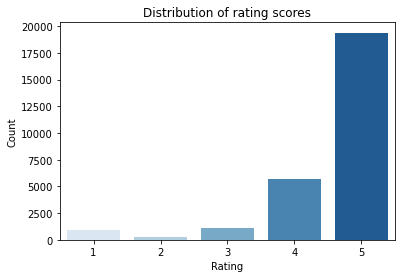

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(sentiment_df['reviews_rating'], palette='Blues')

plt.title('Distribution of rating scores')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [28]:
sentiment_df['review_len'] = sentiment_df['reviews_text'].astype(str).apply(len)
sentiment_df['word_count'] = sentiment_df['reviews_text'].apply(lambda x: len(str(x).split()))

<AxesSubplot:>

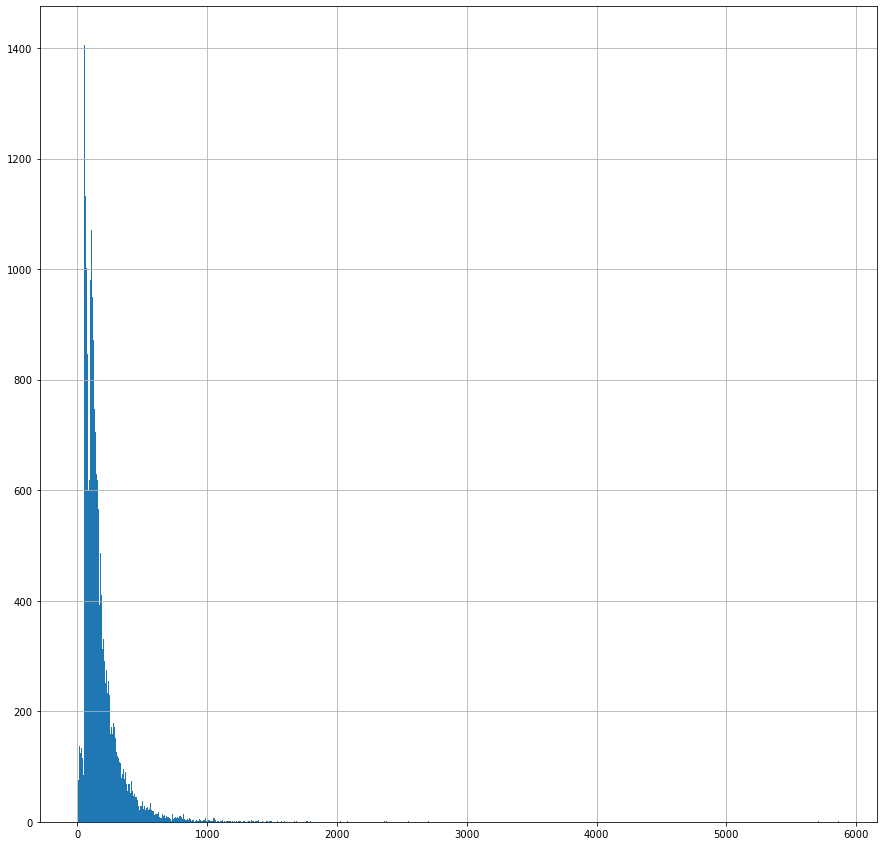

In [29]:
fig = plt.figure(figsize = (15,15))
sentiment_df['review_len'].hist(bins=1000)

We have a right skewed distribution where most of the lengths falls between 0-1000

**Review Text Word Count Distribution**

<AxesSubplot:>

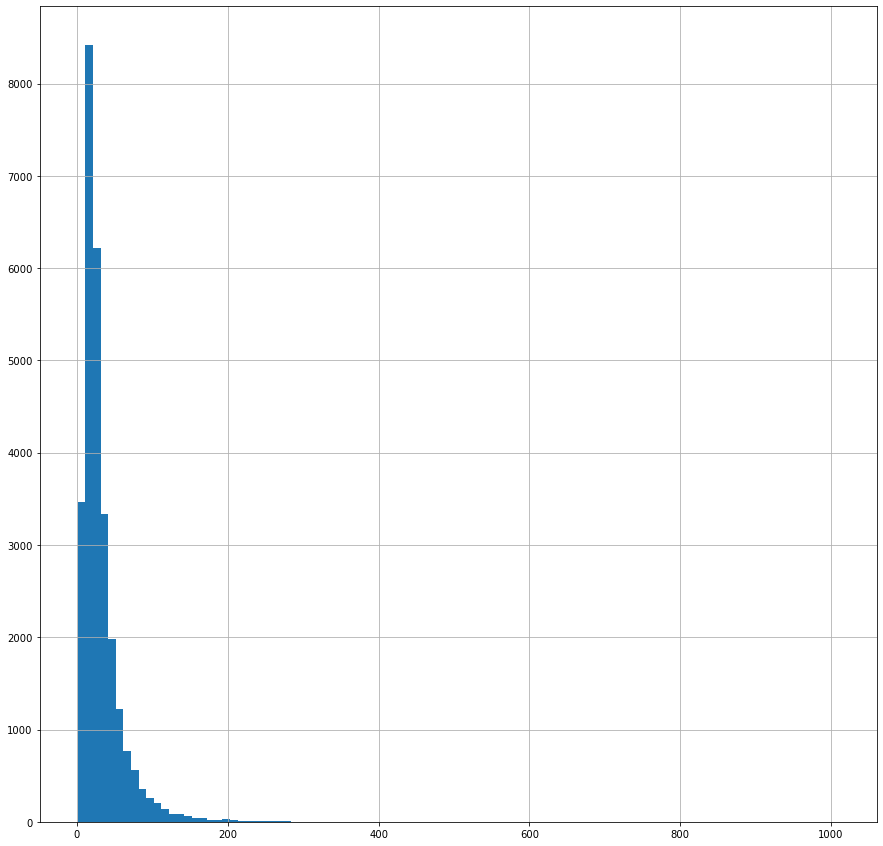

In [30]:
fig = plt.figure(figsize = (15,15))
sentiment_df['word_count'].hist(bins=100)

We have a right skewed distribution with most of the words falling between 0-200 in a a review

**Year vs Sentiment count**

In [31]:
sentiment_df["year"] = sentiment_df["reviews_date"].apply(lambda x : x[0:4])

In [32]:
sentiment_df["year"] 

3        2016
4        2016
5        2016
6        2016
7        2016
         ... 
29995    2017
29996    2017
29997    2017
29998    2017
29999    2017
Name: year, Length: 27405, dtype: object

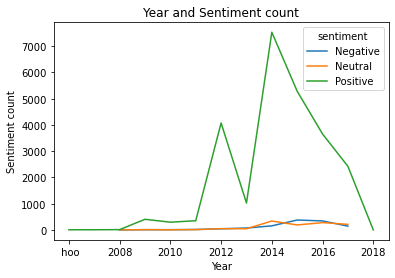

In [33]:
sentiment_df.groupby(['year','sentiment'])['sentiment'].count().unstack().plot(legend=True)
plt.title('Year and Sentiment count')
plt.xlabel('Year')
plt.ylabel('Sentiment count')
plt.show()

**Day of month vs Reviews count**

In [34]:
sentiment_df["day"] = sentiment_df["reviews_date"].apply(lambda x : x[5:7])

In [35]:
sentiment_df["day"] 

3        01
4        12
5        04
6        02
7        02
         ..
29995    01
29996    01
29997    01
29998    01
29999    01
Name: day, Length: 27405, dtype: object

In [36]:
sentiment_df["day"].value_counts()

01    7077
12    5739
02    2829
10    1820
11    1773
09    1689
03    1296
08    1131
04    1075
05    1053
06    1002
07     913
s        8
Name: day, dtype: int64

In [37]:
sentiment_df = sentiment_df[sentiment_df.day != "s "]

In [38]:
sentiment_df.day.value_counts()

01    7077
12    5739
02    2829
10    1820
11    1773
09    1689
03    1296
08    1131
04    1075
05    1053
06    1002
07     913
Name: day, dtype: int64

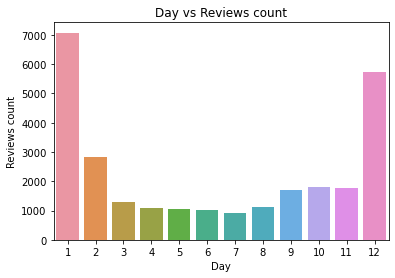

In [39]:
#Creating a dataframe
day=pd.DataFrame(sentiment_df.groupby('day')['reviews_text'].count()).reset_index()
day['day']=day['day'].astype('int64')
day.sort_values(by=['day'])

#Plotting the graph
sns.barplot(x="day", y="reviews_text", data=day)
plt.title('Day vs Reviews count')
plt.xlabel('Day')
plt.ylabel('Reviews count')
plt.show()

### **N-gram analysis**

 Here we will be using ngrams to analyse the text, based on it's sentiment

#### **Monogram analysis**

In [40]:
#Filtering data
review_pos = sentiment_df[sentiment_df["sentiment"]=='Positive'].dropna()
review_neu = sentiment_df[sentiment_df["sentiment"]=='Neutral'].dropna()
review_neg = sentiment_df[sentiment_df["sentiment"]=='Negative'].dropna()

## custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

## Get the bar chart from positive reviews ##
def gettraces(reviews, color, ngram = 1):
    freq_dict = defaultdict(int)
    for sent in reviews["reviews_text"]:
        for word in generate_ngrams(sent, ngram):
            freq_dict[word] += 1
    # print(freq_dict)
    fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
    fd_sorted.columns = ["word", "wordcount"]
    return horizontal_bar_chart(fd_sorted.head(25), color)

def plot_ngram_reviews(ngram=1):
    trace0 = gettraces(review_pos, 'green', ngram)
    trace1 = gettraces(review_neu, 'grey', ngram)
    trace2 = gettraces(review_neg, 'red', ngram)
    # Creating two subplots
    fig = subplots.make_subplots(rows=3, cols=1, vertical_spacing=0.04,
                            subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                            "Frequent words of negative reviews"])
    fig.append_trace(trace0, 1, 1)
    fig.append_trace(trace1, 2, 1)
    fig.append_trace(trace2, 3, 1)
    fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
    iplot(fig, filename='word-plots')


In [41]:
# plot unigram
plot_ngram_reviews(1)

### **Bigram analysis**
Here we will plot most frequent two words in reviews based on sentiments

In [42]:
plot_ngram_reviews(2)

### **Trigram analysis**
Here we will plot most frequent three words in reviews based on sentiments

In [43]:
plot_ngram_reviews(3)

**Wordcloud-Positive reviews**
Let's look at the word cloud of positive reviews

In [44]:
def show_word_cloud(reviews):
    text = reviews["reviews_text"]
    wordcloud = WordCloud(
        width = 3000,
        height = 2000,
        background_color = 'black',
        stopwords = STOPWORDS).generate(str(text))
    fig = plt.figure(
        figsize = (10, 10),
        facecolor = 'k',
        edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

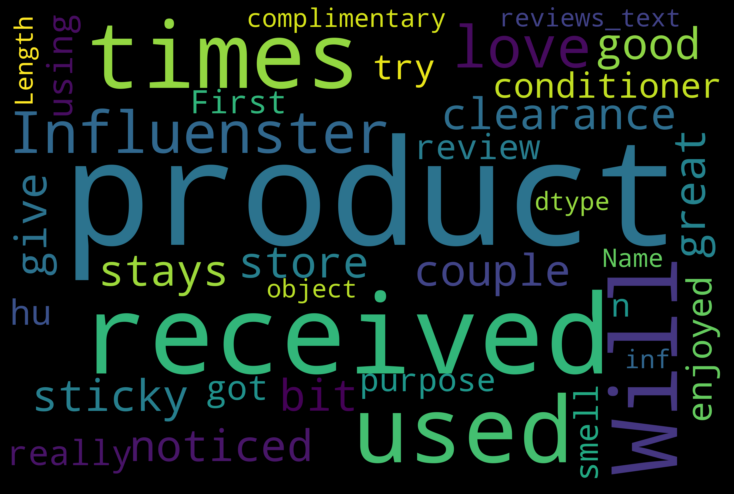

In [45]:
show_word_cloud(review_pos)

**Here we can see positive words like love, enjoyed, good, great etc**

**Wordcloud-Neutral reviews**
Let's look at the word cloud of neutral reviews

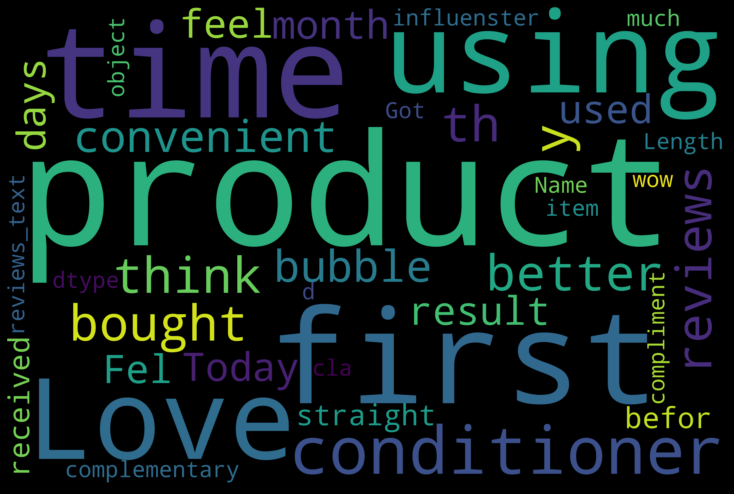

In [46]:
show_word_cloud(review_neu)

**Here we can see neutral words like feel, think, convenient, better etc**

**Wordcloud-Negative reviews**
Let's look at the word cloud of negative reviews

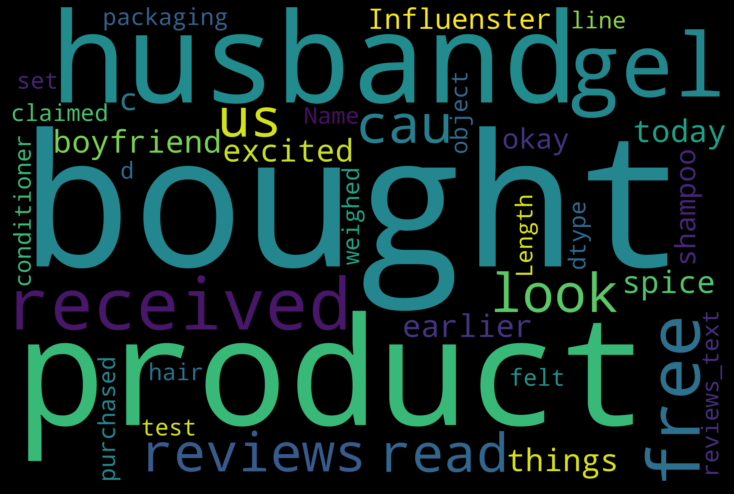

In [47]:
show_word_cloud(review_neg)

As the number of negative reviews are pretty less compared to Neutral and positive, we cant find much negative words in word cloud.


## **Text Processing and Feature Extraction**

### Text Cleaning
- Remove punctuationsMake text lowercase, remove text in square brackets,remove links,remove punctuation
  and remove words containing numbers
- Tokenize text
- Remove Stopwords
- Stemming


#### Merging review_text and reviews_title

In [48]:
# sentiment_df['reviews_text'] = sentiment_df['reviews_text']  + ' ' + sentiment_df['reviews_title'] 
sentiment_df.head()

reviews_text  reviews_rating  \
3  I read through the reviews on here before look...               1   
4  My husband bought this gel for us. The gel cau...               1   
5  My boyfriend and I bought this to spice things...               1   
6  Bought this earlier today and was excited to c...               1   
7  I bought this product for my husband and I to ...               1   

  user_sentiment reviews_doRecommend     reviews_title  \
3       Negative               False      Disappointed   
4       Negative               False        Irritation   
5       Negative               False      Not worth it   
6       Negative               False     Disappointing   
7       Negative               False  Not happy at all   

               reviews_date sentiment  equal test_user_sentiment  test_equal  \
3  2016-01-06T00:00:00.000Z  Negative   True            Negative        True   
4  2016-12-21T00:00:00.000Z  Negative   True            Negative        True   
5  2016-04-20T00:00:00.000Z  Negative   True            Negative        True   
6  2016-02-08T00:00:00.000Z  Negative   True            Negative        True   
7  2016-02-21T00:00:00.000Z  Negative   True            Negative        True   

   review_len  word_count  year day  
3         696         124  2016  01  
4         132          25  2016  12  
5         277          52  2016  04  
6         248          47  2016  02  
7         238          48  2016  02

In [49]:
import string
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [50]:
sentiment_df['reviews_text']=sentiment_df['reviews_text'].apply(lambda x:review_cleaning(x))
sentiment_df.head()

reviews_text  reviews_rating  \
3  i read through the reviews on here before look...               1   
4  my husband bought this gel for us the gel caus...               1   
5  my boyfriend and i bought this to spice things...               1   
6  bought this earlier today and was excited to c...               1   
7  i bought this product for my husband and i to ...               1   

  user_sentiment reviews_doRecommend     reviews_title  \
3       Negative               False      Disappointed   
4       Negative               False        Irritation   
5       Negative               False      Not worth it   
6       Negative               False     Disappointing   
7       Negative               False  Not happy at all   

               reviews_date sentiment  equal test_user_sentiment  test_equal  \
3  2016-01-06T00:00:00.000Z  Negative   True            Negative        True   
4  2016-12-21T00:00:00.000Z  Negative   True            Negative        True   
5  2016-04-20T00:00:00.000Z  Negative   True            Negative        True   
6  2016-02-08T00:00:00.000Z  Negative   True            Negative        True   
7  2016-02-21T00:00:00.000Z  Negative   True            Negative        True   

   review_len  word_count  year day  
3         696         124  2016  01  
4         132          25  2016  12  
5         277          52  2016  04  
6         248          47  2016  02  
7         238          48  2016  02


#### **Encoding target variable-sentiment**

Let's encode our target variable with Label encoder.

In [51]:
# calling the label encoder function
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'sentiment'. 
sentiment_df['sentiment']= label_encoder.fit_transform(sentiment_df['user_sentiment']) 
  
sentiment_df['sentiment'].unique()

array([0, 1])

In [52]:
sentiment_df['sentiment'].value_counts()

1    24460
0     2937
Name: sentiment, dtype: int64

In [53]:
#Extracting 'reviews' for processing
review_features=sentiment_df.copy()
review_features=review_features[['reviews_text']].reset_index(drop=True)
review_features.head()

reviews_text
0  i read through the reviews on here before look...
1  my husband bought this gel for us the gel caus...
2  my boyfriend and i bought this to spice things...
3  bought this earlier today and was excited to c...
4  i bought this product for my husband and i to ...

**Remove Stop Words**

In [54]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
review_features['reviews_text'] = review_features['reviews_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
review_features.head(200)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sgunturi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


reviews_text
0    read reviews looking buying one couples lubric...
1    husband bought gel us gel caused irritation fe...
2    boyfriend bought spice things bedroom highly d...
3    bought earlier today excited check based produ...
4    bought product husband try impressed tingling ...
..                                                 ...
195  happy product would recommend says review coll...
196  amazing product hydrates regenerates skinrichr...
197  lives promise great product oil olay worth mon...
198  product makes face feel like deaged twenty yea...
199  product around awhile still delivers good resu...

[200 rows x 1 columns]

In [55]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
# review_features['reviews_text'] = review_features['reviews_text'].apply(simple_stemmer)

## **Feature Extraction using TFIDF**

In order to extract features from the text data, you may choose from any of the methods, including bag-of-words, TF-IDF vectorization or word embedding.

TFIDF(Term Frequency — Inverse Document Frequency)
TF-IDF stands for “Term Frequency — Inverse Document Frequency”. This is a technique to quantify a word in documents, we generally compute a weight to each word which signifies the importance of the word in the document and corpus. This method is a widely used technique in Information Retrieval and Text Mining.

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(review_features['reviews_text'])

In [57]:
X.shape

(27397, 17718)

In [58]:
y=sentiment_df['sentiment']

# **Handling Imbalance target feature-SMOTE**

In [59]:
print(f'Original dataset shape : {collections.Counter(y)}')

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print(f'Resampled dataset shape {collections.Counter(y_res)}')

Original dataset shape : Counter({1: 24460, 0: 2937})
Resampled dataset shape Counter({0: 24460, 1: 24460})


**Great, as you can see the resampled data has equally distributed classes**

### **Train-test split(75:25)**

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=0)

### **Model building**

You need to build at least three ML models. You then need to analyse the performance of each of these models and choose the best model. At least three out of the following four models need to be built (Do not forget, if required, handle the class imbalance and perform hyperparameter tuning.). 
1. Logistic regression
2. Random forest
3. XGBoost
4. Naive Bayes

In [61]:
#creating the objects
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from xgboost.sklearn import XGBClassifier


logreg_cv = LogisticRegression(random_state=0, solver='lbfgs',class_weight='balanced', max_iter=10000)
rf_cv=RandomForestClassifier()
xgb_cv=XGBClassifier()
gnb_cv=GaussianNB()
cv_dict = {0: 'Logistic Regression', 1: 'Random Forest',2:'XGB',3:'Gaussian'}
cv_models=[logreg_cv,rf_cv,xgb_cv,gnb_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.8912271914466092
Random Forest Test Accuracy: 0.9106463944697168
[03:05:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\sgunturi\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\sgunturi\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[03:05:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\sgunturi\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[03:05:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\sgunturi\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[03:06:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\sgunturi\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[03:06:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\sgunturi\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[03:06:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\sgunturi\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[03:06:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\sgunturi\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[03:06:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\sgunturi\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[03:06:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\sgunturi\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[03:06:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB Test Accuracy: 0.9401741271655968
Gaussian Test Accuracy: nan


C:\Users\sgunturi\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sgunturi\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sgunturi\AppData\Roaming\Python\Python38\site-packages\sklearn\naive_bayes.py", line 207, in fit
    X, y = self._validate_data(X, y)
  File "C:\Users\sgunturi\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\sgunturi\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\sgunturi\AppData\Roaming\Python\Python38\site-packages

In [62]:
xgb_cv.fit(X_train, y_train)
xgb_cv.score(X_test, y_test)

C:\Users\sgunturi\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[03:06:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9533932951757972

In [63]:
rf_cv.fit(X_train, y_train)
rf_cv.score(X_test, y_test)

0.9743254292722813

In [64]:
logreg_cv.fit(X_train, y_train)
logreg_cv.score(X_test,y_test)

0.9527391659852821

In case of Logistic regression, Random Forest The validation accuracy is greater than training accuracy. This means that the model has generalized fine. Lets try to tune Logistic regression.

### HyperParameter tuning for logistic regression

In [65]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=0, solver='lbfgs',class_weight='balanced', max_iter=10000), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

C:\Users\sgunturi\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_search.py:922: UserWarning:

One or more of the test scores are non-finite: [       nan 0.82597438        nan 0.82695557        nan 0.82752794
        nan 0.82897247        nan 0.83085309        nan 0.8329245
        nan 0.83589534        nan 0.83954756        nan 0.84352685
        nan 0.84777869        nan 0.85257563        nan 0.85791769
        nan 0.86396838        nan 0.87050968        nan 0.87664214
        nan 0.88372854        nan 0.89029708        nan 0.89779231
        nan 0.90577814        nan 0.91390025        nan 0.92153175
        nan 0.92793677        nan 0.9336604         nan 0.93954756
        nan 0.9453257         nan 0.95031344        nan 0.95451077
        nan 0.95799945        nan 0.96116108        nan 0.96375034
        nan 0.96584901        nan 0.96745707        nan 0.96824748
        nan 0.9681112         nan 0.96895612        nan 0.96917416
        nan 0.96925593        na

LogisticRegression(C=75.43120063354607, class_weight='balanced', max_iter=10000,
                   random_state=0)
The mean accuracy of the model is: 0.9739983646770237


In [66]:
logreg = LogisticRegression(C=75.43120063354607, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=0, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.97


We have got 96% accuracy. That ain't bad. But for classification problems we need to get confusion matrix and check f1 score rather than accuracy

### **Classification metrics**

Here we plot the confusion matrix with ROC and check our f1 score

In [67]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization


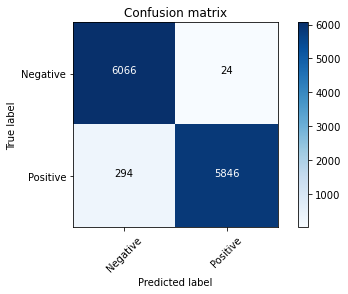

In [68]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Negative','Positive'])

Check out the diagonal elements(6047+5805), they are correctly predicted records and rest are incorrectly classified by the algorithm


In [69]:
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      6090
           1       1.00      0.95      0.97      6140

    accuracy                           0.97     12230
   macro avg       0.97      0.97      0.97     12230
weighted avg       0.97      0.97      0.97     12230



Since predicting both positive,negative are important we are considering.We got a pretty good f1 score. As we see it got a good score across all classes classified

**ROC-AUC curve**
This is a very important curve where we decide on which threshold to setup based upon the objective criteria. Here we plotted ROC for different classes which can help us understand which class was classified better. Also we plot micro and macro averages on the roc curve.

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.964


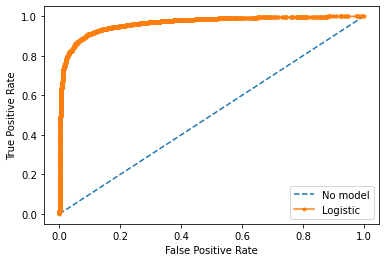

In [70]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
# X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(C=75.43120063354607, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=0, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No model')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### Dump the logistic regression model and the vectorizer to pickle file

In [71]:
filename = 'sentiment_model.pkl'
pickle.dump(logreg_cv, open(filename, 'wb'))
filename_v = 'vectorizer.pkl'
pickle.dump(vectorizer, open(filename_v, 'wb'))

### Test Model

In [72]:
text = "Very happy with this product "

In [73]:
 loaded_model = pickle.load(open('sentiment_model.pkl', 'rb'))
 loaded_vectorizer = pickle.load(open('vectorizer.pkl', 'rb'))

In [74]:
input = loaded_vectorizer.transform([text])
print(input.shape)
loaded_model.predict(input)

(1, 17718)


array([1])

In [75]:
text = "worst product dont buy"

In [76]:
input = loaded_vectorizer.transform([text])
print(input.shape)
loaded_model.predict(input)

(1, 17718)


array([0])

## Conclusion for Sentiment Analysis Model
We have done a pretty neat job on classifying all the classes starting from splitting the sentiments based on rating ,text cleaning, customize the stopwords list based on requirement and finally handling imbalance with smote. In sentiment analysis, we should concentrate on our f1 score where we got an average of 97% so we did a pretty good job.


# Recommendation System

## Introduction to Recommendation systems

These days there are so many products and services as well as information about each one that can overwhelm users and consumers, in order to help them to choose the product and services Recommendation Systems were developed. Recommeder system creates a similarity between the user and items and exploits the similarity between user/item to make recommendations. main benefits of the recommender system are as follow:

- it's easier for the user/consumer to choose the product/service, which leads to better user experience.
- Boosting user interaction with the system or leading to higher sales. For example, there's 40% more click on the google news due to recommendation.
- Better matching the product/service with user/consumer needs.In Amazon , 35 % products get sold due to recommendation.
- Creates more personalized experience for the user/consumer. such as In Netflix most of the rented movies are from recommendations.

## Types of Recommendation Systems

There are mainly 6 types of the recommendations systems :-

- Popularity based systems :- It works by recommending items viewed and purchased by most people and are rated high.It is not a personalized recommendation.
- Classification model based:- It works by understanding the features of the user and applying the classification algorithm to decide whether the user is interested or not in the product.
- Content based recommendations:- It is based on the information on the contents of the item rather than on the user opinions.The main idea is if the user likes an item then he or she will like the "other" similar item.
- Collaborative Filtering:- It is based on the assumption that people like things similar to other things they like, and things that are liked by other people with similar taste. it is mainly of two types: a) User-User b) Item -Item
- Hybrid Approaches:- This system approach is to combine collaborative filtering, content-based filtering, and other approaches - Association rule mining :- Association rules capture the relationships between items based on their patterns of co-occurrence across transactions.


## Building a recommendation system
In this project we are going to use the following types of recommendation systems. 

1. User-based recommendation system

2. Item-based recommendation system 

Your task is to analyse the recommendation systems and select the one that is best suited in this case.  

Once you get the best-suited recommendation system, the next task is to recommend 20 products that a user is most likely to purchase based on the ratings. You can use the 'reviews_username' (one of the columns in the dataset) to identify your user.
**We will use “rmse” as our accuracy metric for the predictions against the original benchmark model.**

## Load the dataset

In [77]:
ecommerce_df = pd.read_csv("sample30.csv")

In [78]:
ecommerce_df.head()

id            brand  \
0  AV13O1A8GV-KLJ3akUyj  Universal Music   
1  AV14LG0R-jtxr-f38QfS         Lundberg   
2  AV14LG0R-jtxr-f38QfS         Lundberg   
3  AV16khLE-jtxr-f38VFn              K-Y   
4  AV16khLE-jtxr-f38VFn              K-Y   

                                          categories  \
0  Movies, Music & Books,Music,R&b,Movies & TV,Mo...   
1  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...   
2  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...   
3  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
4  Personal Care,Medicine Cabinet,Lubricant/Sperm...   

                         manufacturer  \
0  Universal Music Group / Cash Money   
1                            Lundberg   
2                            Lundberg   
3                                 K-Y   
4                                 K-Y   

                                         name              reviews_date  \
0   Pink Friday: Roman Reloaded Re-Up (w/dvd)  2012-11-30T06:21:45.000Z   
1  Lundberg Organic Cinnamon Toast Rice Cakes  2017-07-09T00:00:00.000Z   
2  Lundberg Organic Cinnamon Toast Rice Cakes  2017-07-09T00:00:00.000Z   
3            K-Y Love Sensuality Pleasure Gel  2016-01-06T00:00:00.000Z   
4            K-Y Love Sensuality Pleasure Gel  2016-12-21T00:00:00.000Z   

  reviews_didPurchase reviews_doRecommend  reviews_rating  \
0                 NaN                 NaN               5   
1                True                 NaN               5   
2                True                 NaN               5   
3               False               False               1   
4               False               False               1   

                                        reviews_text reviews_title  \
0  i love this album. it's very good. more to the...  Just Awesome   
1  Good flavor. This review was collected as part...          Good   
2                                       Good flavor.          Good   
3  I read through the reviews on here before look...  Disappointed   
4  My husband bought this gel for us. The gel cau...    Irritation   

  reviews_userCity reviews_userProvince reviews_username user_sentiment  
0      Los Angeles                  NaN           joshua       Positive  
1              NaN                  NaN        dorothy w       Positive  
2              NaN                  NaN        dorothy w       Positive  
3              NaN                  NaN          rebecca       Negative  
4              NaN                  NaN        walker557       Negative

## Data Cleaning and PreProcessing

In [79]:
ecommerce_df = ecommerce_df.drop(['brand','categories','manufacturer','reviews_date','reviews_didPurchase','reviews_doRecommend','reviews_text','reviews_title','reviews_userCity','reviews_userProvince','user_sentiment'], axis = 1)

In [80]:
ecommerce_df.reviews_rating.value_counts()

5    20831
4     6020
1     1384
3     1345
2      420
Name: reviews_rating, dtype: int64

In [81]:
ecommerce_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                30000 non-null  object
 1   name              30000 non-null  object
 2   reviews_rating    30000 non-null  int64 
 3   reviews_username  29937 non-null  object
dtypes: int64(1), object(3)
memory usage: 937.6+ KB


In [82]:
print('Minimum rating is: %d' %(ecommerce_df.reviews_rating.min()))
print('Maximum rating is: %d' %(ecommerce_df.reviews_rating.max()))

Minimum rating is: 1
Maximum rating is: 5


In [83]:
# check for missing values
print('Number of missing values across columns: \n',ecommerce_df.isnull().sum())

Number of missing values across columns: 
 id                   0
name                 0
reviews_rating       0
reviews_username    63
dtype: int64


In [84]:
ecommerce_df.describe()['reviews_rating'].T

count    30000.000000
mean         4.483133
std          0.988441
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: reviews_rating, dtype: float64

### Drop all duplicates in id, name and reviews_username

In [85]:
ecommerce_df.drop_duplicates(subset = ['id', 'name', 'reviews_username'], inplace=True)

In [86]:
ecommerce_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27605 entries, 0 to 29999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                27605 non-null  object
 1   name              27605 non-null  object
 2   reviews_rating    27605 non-null  int64 
 3   reviews_username  27588 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


In [87]:
ecommerce_df.reviews_rating.value_counts()

5    19465
4     5480
3     1221
1     1063
2      376
Name: reviews_rating, dtype: int64

In [88]:
ecommerce_df.isnull().sum()

id                   0
name                 0
reviews_rating       0
reviews_username    17
dtype: int64

### Drop all na fields in username

In [89]:
ecommerce_df.dropna(subset=['reviews_username'], inplace=True)

In [90]:
ecommerce_df.reviews_rating.value_counts()

5    19456
4     5478
3     1220
1     1059
2      375
Name: reviews_rating, dtype: int64

In [91]:
ecommerce_df.head(10)

id                                        name  \
0   AV13O1A8GV-KLJ3akUyj   Pink Friday: Roman Reloaded Re-Up (w/dvd)   
1   AV14LG0R-jtxr-f38QfS  Lundberg Organic Cinnamon Toast Rice Cakes   
3   AV16khLE-jtxr-f38VFn            K-Y Love Sensuality Pleasure Gel   
4   AV16khLE-jtxr-f38VFn            K-Y Love Sensuality Pleasure Gel   
5   AV16khLE-jtxr-f38VFn            K-Y Love Sensuality Pleasure Gel   
6   AV16khLE-jtxr-f38VFn            K-Y Love Sensuality Pleasure Gel   
7   AV16khLE-jtxr-f38VFn            K-Y Love Sensuality Pleasure Gel   
8   AV16khLE-jtxr-f38VFn            K-Y Love Sensuality Pleasure Gel   
9   AV16khLE-jtxr-f38VFn            K-Y Love Sensuality Pleasure Gel   
10  AV16khLE-jtxr-f38VFn            K-Y Love Sensuality Pleasure Gel   

    reviews_rating reviews_username  
0                5           joshua  
1                5        dorothy w  
3                1          rebecca  
4                1        walker557  
5                1         samantha  
6                1          raeanne  
7                1           kimmie  
8                1           cassie  
9                1         moore222  
10               1          jds1992

In [92]:
# check how many names are unique
ecommerce_df.name.nunique()

271

In [93]:
ecommerce_df.isnull().sum()

id                  0
name                0
reviews_rating      0
reviews_username    0
dtype: int64

C:\Users\sgunturi\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

C:\Users\sgunturi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



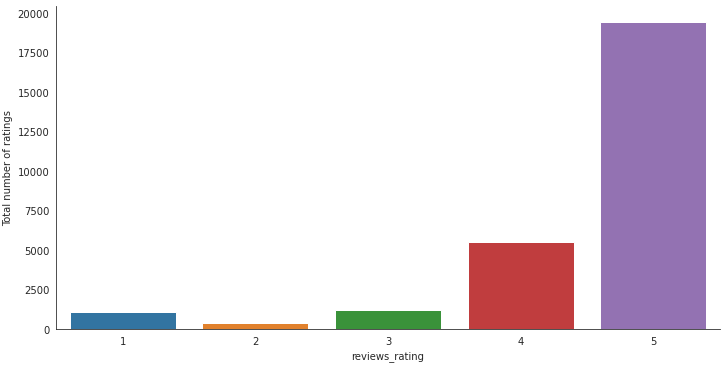

In [94]:
import seaborn as sns
with sns.axes_style('white'):
    g = sns.factorplot("reviews_rating", data=ecommerce_df, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

In [95]:
print("\nTotal no of ratings :",ecommerce_df.shape[0])
print("Total No of Users   :", len(np.unique(ecommerce_df.id)))
print("Total No of products  :", len(np.unique(ecommerce_df.reviews_username)))


Total no of ratings : 27588
Total No of Users   : 271
Total No of products  : 24914


In [96]:
num_of_rated_products_per_user = reviews_df.groupby(by='reviews_username')['reviews_rating'].count().sort_values(ascending=False)
num_of_rated_products_per_user.head()

reviews_username
mike                 41
byamazon customer    41
chris                32
lisa                 16
rick                 15
Name: reviews_rating, dtype: int64

In [97]:
num_of_rated_products_per_user.describe()

count    24914.000000
mean         1.201614
std          0.771026
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         41.000000
Name: reviews_rating, dtype: float64

In [98]:
quantiles = num_of_rated_products_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

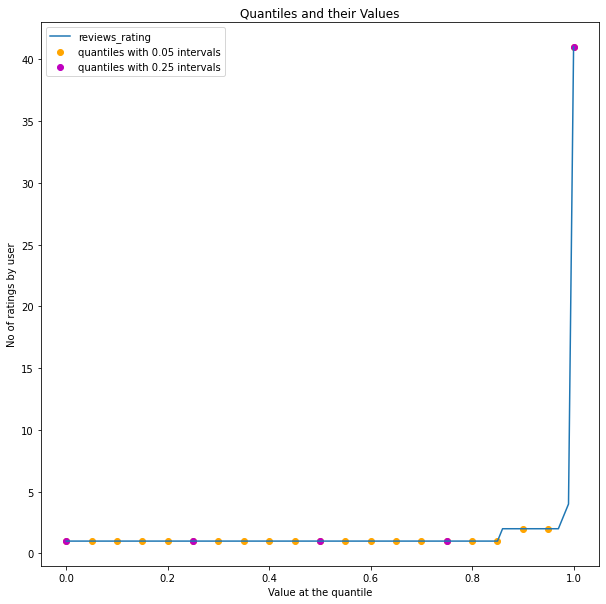

In [99]:
plt.figure(figsize=(10,10))
plt.title("Quantiles and their Values")
quantiles.plot()
# quantiles with 0.05 difference
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
plt.ylabel('No of ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')
plt.show()

In [100]:
print('\n Number of users who have rated more than 50 products: {}\n'.format(sum(num_of_rated_products_per_user >= 20)) )


 Number of users who have rated more than 50 products: 3



### **Popularity based recommendations**

Popularity based recommendation system works with the trend. It basically uses the items which are in trend right now. For example, if any product which is usually bought by every new user then there are chances that it may suggest that item to the user who just signed up.

The problems with popularity based recommendation system is that the personalization is not available with this method i.e. even though you know the behaviour of the user you cannot recommend items accordingly.


In [101]:
new_df=ecommerce_df.groupby("name").filter(lambda x:x['reviews_rating'].count() >=50)

In [102]:
new_df.head()

id                                               name  \
54  AV1l8zRZvKc47QAVhnAv  Olay Regenerist Deep Hydration Regenerating Cream   
55  AV1l8zRZvKc47QAVhnAv  Olay Regenerist Deep Hydration Regenerating Cream   
56  AV1l8zRZvKc47QAVhnAv  Olay Regenerist Deep Hydration Regenerating Cream   
57  AV1l8zRZvKc47QAVhnAv  Olay Regenerist Deep Hydration Regenerating Cream   
58  AV1l8zRZvKc47QAVhnAv  Olay Regenerist Deep Hydration Regenerating Cream   

    reviews_rating reviews_username  
54               1       alnscoob97  
55               1           star33  
56               1          jacmary  
57               1          mabelle  
58               1             kayc

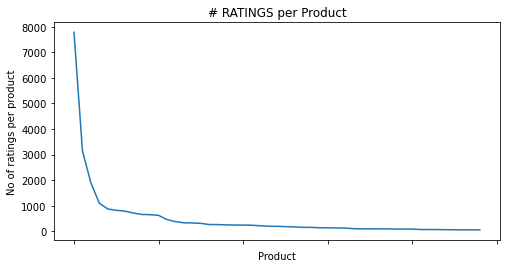

In [103]:
num_of_ratings_per_product = new_df.groupby(by='name')['reviews_rating'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(num_of_ratings_per_product.values)
plt.title('# RATINGS per Product')
plt.xlabel('Product')
plt.ylabel('No of ratings per product')
ax.set_xticklabels([])

plt.show()

In [104]:
new_df.groupby('name')['reviews_rating'].mean().head()

name
100:Complete First Season (blu-Ray)                                                   4.711111
Alex Cross (dvdvideo)                                                                 4.264286
Aussie Aussome Volume Shampoo, 13.5 Oz                                                4.218391
Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz    3.556911
Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter       4.886792
Name: reviews_rating, dtype: float64

In [105]:
# total no of rating for each product
new_df.groupby('name')['reviews_rating'].count().sort_values(ascending=False).head()

name
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total              7786
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd        3148
Clorox Disinfecting Bathroom Cleaner                                   1893
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)    1097
Burt's Bees Lip Shimmer, Raisin                                         873
Name: reviews_rating, dtype: int64

In [106]:
ratings_mean_count = pd.DataFrame(new_df.groupby('name')['reviews_rating'].mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(new_df.groupby('name')['reviews_rating'].count())
ratings_mean_count.head()

reviews_rating  \
name                                                                 
100:Complete First Season (blu-Ray)                       4.711111   
Alex Cross (dvdvideo)                                     4.264286   
Aussie Aussome Volume Shampoo, 13.5 Oz                    4.218391   
Aveeno Baby Continuous Protection Lotion Sunscr...        3.556911   
Avery174 Ready Index Contemporary Table Of Cont...        4.886792   

                                                    rating_counts  
name                                                               
100:Complete First Season (blu-Ray)                           135  
Alex Cross (dvdvideo)                                         140  
Aussie Aussome Volume Shampoo, 13.5 Oz                         87  
Aveeno Baby Continuous Protection Lotion Sunscr...            246  
Avery174 Ready Index Contemporary Table Of Cont...            265

In [107]:
ratings_mean_count['rating_counts'].max()

7786

<AxesSubplot:>

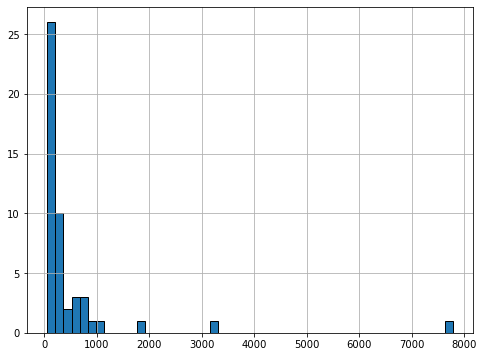

In [108]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)

<AxesSubplot:>

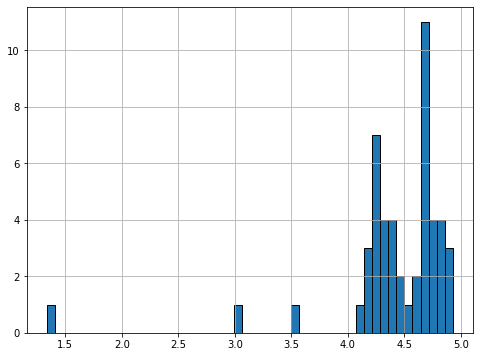

In [109]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['reviews_rating'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

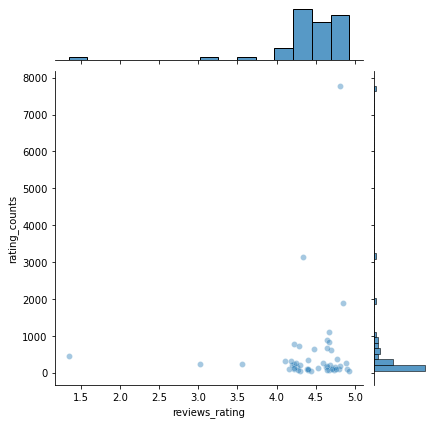

In [110]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='reviews_rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

<AxesSubplot:xlabel='name'>

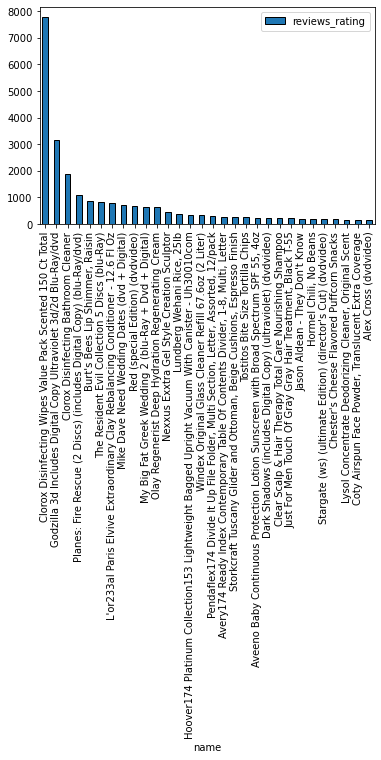

In [111]:
popular_products = pd.DataFrame(new_df.groupby('name')['reviews_rating'].count())
most_popular = popular_products.sort_values('reviews_rating', ascending=False)
most_popular.head(30).plot(kind = "bar")

In [112]:
ecommerce_df.to_csv("processed_samples30.csv")

In [113]:
ecommerce_df.isnull().sum()

id                  0
name                0
reviews_rating      0
reviews_username    0
dtype: int64

### Dividing the dataset into train and test

In [114]:
train, test = train_test_split(ecommerce_df, test_size=0.30, random_state=31)

In [115]:
print(train.shape)
print(test.shape)

(19311, 4)
(8277, 4)


In [116]:
train.reviews_username.unique()

array(['jlcii', 'susanb', 'cbenn93308', ..., 'susheii', 'wyoshopgril',
       'bishop'], dtype=object)

In [117]:
# Pivot the train ratings' dataset into matrix format in which columns are movies and the rows are user IDs.
df_pivot = ecommerce_df.pivot(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
).fillna(0)

In [118]:
df_pivot.head(10)

name              0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest  \
reviews_username                                                                  
00dog3                                                          0.0               
00sab00                                                         0.0               
01impala                                                        0.0               
02dakota                                                        0.0               
02deuce                                                         0.0               
0325home                                                        0.0               
06stidriver                                                     0.0               
08dallas                                                        0.0               
09mommy11                                                       0.0               
1.11E+24                                                        0.0               

name              100:Complete First Season (blu-Ray)  \
reviews_username                                        
00dog3                                            0.0   
00sab00                                           0.0   
01impala                                          0.0   
02dakota                                          0.0   
02deuce                                           0.0   
0325home                                          0.0   
06stidriver                                       0.0   
08dallas                                          5.0   
09mommy11                                         0.0   
1.11E+24                                          0.0   

name              2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black  \
reviews_username                                                                      
00dog3                                                          0.0                   
00sab00                                                         0.0                   
01impala                                                        0.0                   
02dakota                                                        0.0                   
02deuce                                                         0.0                   
0325home                                                        0.0                   
06stidriver                                                     0.0                   
08dallas                                                        0.0                   
09mommy11                                                       0.0                   
1.11E+24                                                        0.0                   

name              2x Ultra Era with Oxi Booster, 50fl oz  \
reviews_username                                           
00dog3                                               0.0   
00sab00                                              0.0   
01impala                                             0.0   
02dakota                                             0.0   
02deuce                                              0.0   
0325home                                             0.0   
06stidriver                                          0.0   
08dallas                                             0.0   
09mommy11                                            0.0   
1.11E+24                                             0.0   

name              42 Dual Drop Leaf Table with 2 Madrid Chairs"  \
reviews_username                                                  
00dog3                                                      0.0   
00sab00                                                     0.0   
01impala                                                    0.0   
02dakota                                                    0.0   
02deuce                                                     0.0   
0325home                                                    0.0   
06stidriver     

### Creating dummy train & dummy test dataset
These dataset will be used for prediction

Dummy train will be used later for prediction of the products which has not been rated by the user. To ignore the products rated by the user, we will mark it as 0 during prediction. The products not rated by user is marked as 1 for prediction in dummy train dataset.

Dummy test will be used for evaluation. To evaluate, we will only make prediction on the products rated by the user. So, this is marked as 1. This is just opposite of dummy_train.

In [119]:
df_pivot.isnull().mean().round(4).mul(100).sort_values(ascending=False)

name
Yes To Grapefruit Rejuvenating Body Wash                         0.0
Equals (blu-Ray)                                                 0.0
Head & Shoulders Dandruff Shampoo Ocean Lift 2 In 1              0.0
Head & Shoulders Classic Clean Conditioner                       0.0
Hawaiian Punch Berry Limeade Blast Juice                         0.0
                                                                ... 
Pacific Natural Foods Organic Beef Broth                         0.0
Orajel Maximum Strength Toothache Pain Relief Liquid             0.0
Olivella Bar Soap - 3.52 Oz                                      0.0
Olay Regenerist Deep Hydration Regenerating Cream                0.0
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest    0.0
Length: 271, dtype: float64

In [120]:
from scipy.sparse import csr_matrix
S = csr_matrix(df_pivot)
print(S)

  (0, 57)	4.0
  (1, 151)	1.0
  (1, 157)	3.0
  (2, 93)	3.0
  (3, 93)	5.0
  (4, 93)	4.0
  (5, 65)	5.0
  (6, 65)	5.0
  (7, 1)	5.0
  (8, 64)	5.0
  (9, 65)	5.0
  (10, 157)	5.0
  (11, 15)	1.0
  (12, 204)	5.0
  (13, 268)	3.0
  (14, 19)	4.0
  (15, 65)	4.0
  (15, 93)	4.0
  (15, 115)	4.0
  (15, 151)	5.0
  (16, 65)	5.0
  (17, 65)	5.0
  (18, 129)	2.0
  (19, 157)	5.0
  (20, 93)	4.0
  :	:
  (24889, 157)	5.0
  (24890, 239)	5.0
  (24891, 151)	4.0
  (24892, 65)	4.0
  (24893, 233)	1.0
  (24894, 41)	5.0
  (24895, 64)	5.0
  (24896, 183)	5.0
  (24897, 62)	1.0
  (24898, 65)	5.0
  (24899, 41)	5.0
  (24900, 251)	4.0
  (24901, 151)	4.0
  (24902, 65)	5.0
  (24903, 41)	5.0
  (24904, 93)	5.0
  (24905, 183)	4.0
  (24906, 200)	5.0
  (24907, 200)	5.0
  (24908, 65)	5.0
  (24909, 65)	5.0
  (24910, 65)	2.0
  (24911, 65)	5.0
  (24912, 157)	5.0
  (24913, 65)	4.0


In [121]:
ecommerce_df.isnull().sum()

id                  0
name                0
reviews_rating      0
reviews_username    0
dtype: int64

In [122]:
dummy_train = train.copy()

In [123]:
dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)

In [124]:
# Convert the dummy train dataset into matrix format.
dummy_train = dummy_train.pivot(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
).fillna(1)

In [125]:
dummy_train.head()

name              0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest  \
reviews_username                                                                  
00dog3                                                          1.0               
00sab00                                                         1.0               
01impala                                                        1.0               
02dakota                                                        1.0               
02deuce                                                         1.0               

name              100:Complete First Season (blu-Ray)  \
reviews_username                                        
00dog3                                            1.0   
00sab00                                           1.0   
01impala                                          1.0   
02dakota                                          1.0   
02deuce                                           1.0   

name              2x Ultra Era with Oxi Booster, 50fl oz  \
reviews_username                                           
00dog3                                               1.0   
00sab00                                              1.0   
01impala                                             1.0   
02dakota                                             1.0   
02deuce                                              1.0   

name              42 Dual Drop Leaf Table with 2 Madrid Chairs"  \
reviews_username                                                  
00dog3                                                      1.0   
00sab00                                                     1.0   
01impala                                                    1.0   
02dakota                                                    1.0   
02deuce                                                     1.0   

name              4C Grated Parmesan Cheese 100% Natural 8oz Shaker  \
reviews_username                                                      
00dog3                                                          1.0   
00sab00                                                         1.0   
01impala                                                        1.0   
02dakota                                                        1.0   
02deuce                                                         1.0   

name              5302050 15/16 FCT/HOSE ADAPTOR  \
reviews_username                                   
00dog3                                       1.0   
00sab00                                      1.0   
01impala                                     1.0   
02dakota                                     1.0   
02deuce                                      1.0   

name              Africa's Best No-Lye Dual Conditioning Relaxer System Super  \
reviews_username                                                                
00dog3                                                          1.0             
00sab00                                                         1.0             
01impala                                                        1.0             
02dakota                                                        1.0             
02deuce                                                         1.0             

name              Alberto VO5 Salon Series Smooth Plus Sleek Shampoo  \
reviews_username                                                       
00dog3                                                          1.0    
00sab00                                                         1.0    
01impala                                                        1.0    
02dakota                                                        1.0    
02deuce                                                         1.0    

name              Alex Cross (dvdvideo)  \
reviews_username                          
00dog3                              1.0   
00sab00                             1.0   
01impala           

In [126]:
dummy_train.isnull().sum()

name
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest    0
100:Complete First Season (blu-Ray)                              0
2x Ultra Era with Oxi Booster, 50fl oz                           0
42 Dual Drop Leaf Table with 2 Madrid Chairs"                    0
4C Grated Parmesan Cheese 100% Natural 8oz Shaker                0
                                                                ..
Weleda Everon Lip Balm                                           0
Wilton Black Dots Standard Baking Cups                           0
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)            0
Yes To Carrots Nourishing Body Wash                              0
Yes To Grapefruit Rejuvenating Body Wash                         0
Length: 255, dtype: int64

## Cosine Similarity

Cosine Similarity is a measurement that quantifies the similarity between two vectors [Which is Rating Vector in this case]

Adjusted Cosine

Adjusted cosine similarity is a modified version of vector-based similarity where we incorporate the fact that different users have different ratings schemes. In other words, some users might rate items highly in general, and others might give items lower ratings as a preference. To handle this nature from rating given by user , we subtract average ratings for each user from each user's rating for different products.

In [127]:
df_pivot.isnull().sum()

name
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest        0
100:Complete First Season (blu-Ray)                                  0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black    0
2x Ultra Era with Oxi Booster, 50fl oz                               0
42 Dual Drop Leaf Table with 2 Madrid Chairs"                        0
                                                                    ..
Weleda Everon Lip Balm                                               0
Wilton Black Dots Standard Baking Cups                               0
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                0
Yes To Carrots Nourishing Body Wash                                  0
Yes To Grapefruit Rejuvenating Body Wash                             0
Length: 271, dtype: int64

In [128]:
df_pivot.head()

name              0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest  \
reviews_username                                                                  
00dog3                                                          0.0               
00sab00                                                         0.0               
01impala                                                        0.0               
02dakota                                                        0.0               
02deuce                                                         0.0               

name              100:Complete First Season (blu-Ray)  \
reviews_username                                        
00dog3                                            0.0   
00sab00                                           0.0   
01impala                                          0.0   
02dakota                                          0.0   
02deuce                                           0.0   

name              2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black  \
reviews_username                                                                      
00dog3                                                          0.0                   
00sab00                                                         0.0                   
01impala                                                        0.0                   
02dakota                                                        0.0                   
02deuce                                                         0.0                   

name              2x Ultra Era with Oxi Booster, 50fl oz  \
reviews_username                                           
00dog3                                               0.0   
00sab00                                              0.0   
01impala                                             0.0   
02dakota                                             0.0   
02deuce                                              0.0   

name              42 Dual Drop Leaf Table with 2 Madrid Chairs"  \
reviews_username                                                  
00dog3                                                      0.0   
00sab00                                                     0.0   
01impala                                                    0.0   
02dakota                                                    0.0   
02deuce                                                     0.0   

name              4C Grated Parmesan Cheese 100% Natural 8oz Shaker  \
reviews_username                                                      
00dog3                                                          0.0   
00sab00                                                         0.0   
01impala                                                        0.0   
02dakota                                                        0.0   
02deuce                                                         0.0   

name              5302050 15/16 FCT/HOSE ADAPTOR  \
reviews_username                                   
00dog3                                       0.0   
00sab00                                      0.0   
01impala                                     0.0   
02dakota                                     0.0   
02deuce                                      0.0   

name              Africa's Best No-Lye Dual Conditioning Relaxer System Super  \
reviews_username                                                                
00dog3                                                          0.0             
00sab00                                                         0.0             
01impala                                                        0.0             
02dakota                                                        0.0             
02deuce                                                         0.0             

name              Alberto VO5 Salon Series Smooth Plus Sleek Shampoo  \
reviews_userna

In [129]:
from sklearn.metrics.pairwise import pairwise_distances

# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_pivot, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1.        0.        0.        ... 0.        0.        0.       ]
 [0.        1.        0.        ... 0.        0.9486833 0.       ]
 [0.        0.        1.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 1.        0.        1.       ]
 [0.        0.9486833 0.        ... 0.        1.        0.       ]
 [0.        0.        0.        ... 1.        0.        1.       ]]


In [130]:
user_correlation.shape

(24914, 24914)

### Using adjusted cosine

### Here, we are not removing the NaN values and calculating the mean only for the products rated by the user

In [131]:
# Create a user-product matrix.
df_pivot = train.pivot(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
)

In [132]:
df_pivot.head()

name              0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest  \
reviews_username                                                                  
00dog3                                                          NaN               
00sab00                                                         NaN               
01impala                                                        NaN               
02dakota                                                        NaN               
02deuce                                                         NaN               

name              100:Complete First Season (blu-Ray)  \
reviews_username                                        
00dog3                                            NaN   
00sab00                                           NaN   
01impala                                          NaN   
02dakota                                          NaN   
02deuce                                           NaN   

name              2x Ultra Era with Oxi Booster, 50fl oz  \
reviews_username                                           
00dog3                                               NaN   
00sab00                                              NaN   
01impala                                             NaN   
02dakota                                             NaN   
02deuce                                              NaN   

name              42 Dual Drop Leaf Table with 2 Madrid Chairs"  \
reviews_username                                                  
00dog3                                                      NaN   
00sab00                                                     NaN   
01impala                                                    NaN   
02dakota                                                    NaN   
02deuce                                                     NaN   

name              4C Grated Parmesan Cheese 100% Natural 8oz Shaker  \
reviews_username                                                      
00dog3                                                          NaN   
00sab00                                                         NaN   
01impala                                                        NaN   
02dakota                                                        NaN   
02deuce                                                         NaN   

name              5302050 15/16 FCT/HOSE ADAPTOR  \
reviews_username                                   
00dog3                                       NaN   
00sab00                                      NaN   
01impala                                     NaN   
02dakota                                     NaN   
02deuce                                      NaN   

name              Africa's Best No-Lye Dual Conditioning Relaxer System Super  \
reviews_username                                                                
00dog3                                                          NaN             
00sab00                                                         NaN             
01impala                                                        NaN             
02dakota                                                        NaN             
02deuce                                                         NaN             

name              Alberto VO5 Salon Series Smooth Plus Sleek Shampoo  \
reviews_username                                                       
00dog3                                                          NaN    
00sab00                                                         NaN    
01impala                                                        NaN    
02dakota                                                        NaN    
02deuce                                                         NaN    

name              Alex Cross (dvdvideo)  \
reviews_username                          
00dog3                              NaN   
00sab00                             NaN   
01impala           

### Normalising the rating of the product for each user around 0 mean

In [133]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [134]:
df_subtracted.head()

name              0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest  \
reviews_username                                                                  
00dog3                                                          NaN               
00sab00                                                         NaN               
01impala                                                        NaN               
02dakota                                                        NaN               
02deuce                                                         NaN               

name              100:Complete First Season (blu-Ray)  \
reviews_username                                        
00dog3                                            NaN   
00sab00                                           NaN   
01impala                                          NaN   
02dakota                                          NaN   
02deuce                                           NaN   

name              2x Ultra Era with Oxi Booster, 50fl oz  \
reviews_username                                           
00dog3                                               NaN   
00sab00                                              NaN   
01impala                                             NaN   
02dakota                                             NaN   
02deuce                                              NaN   

name              42 Dual Drop Leaf Table with 2 Madrid Chairs"  \
reviews_username                                                  
00dog3                                                      NaN   
00sab00                                                     NaN   
01impala                                                    NaN   
02dakota                                                    NaN   
02deuce                                                     NaN   

name              4C Grated Parmesan Cheese 100% Natural 8oz Shaker  \
reviews_username                                                      
00dog3                                                          NaN   
00sab00                                                         NaN   
01impala                                                        NaN   
02dakota                                                        NaN   
02deuce                                                         NaN   

name              5302050 15/16 FCT/HOSE ADAPTOR  \
reviews_username                                   
00dog3                                       NaN   
00sab00                                      NaN   
01impala                                     NaN   
02dakota                                     NaN   
02deuce                                      NaN   

name              Africa's Best No-Lye Dual Conditioning Relaxer System Super  \
reviews_username                                                                
00dog3                                                          NaN             
00sab00                                                         NaN             
01impala                                                        NaN             
02dakota                                                        NaN             
02deuce                                                         NaN             

name              Alberto VO5 Salon Series Smooth Plus Sleek Shampoo  \
reviews_username                                                       
00dog3                                                          NaN    
00sab00                                                         NaN    
01impala                                                        NaN    
02dakota                                                        NaN    
02deuce                                                         NaN    

name              Alex Cross (dvdvideo)  \
reviews_username                          
00dog3                              NaN   
00sab00                             NaN   
01impala           

In [135]:
df_subtracted.isnull().sum()

name
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest    17885
100:Complete First Season (blu-Ray)                              17794
2x Ultra Era with Oxi Booster, 50fl oz                           17888
42 Dual Drop Leaf Table with 2 Madrid Chairs"                    17890
4C Grated Parmesan Cheese 100% Natural 8oz Shaker                17888
                                                                 ...  
Weleda Everon Lip Balm                                           17887
Wilton Black Dots Standard Baking Cups                           17890
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)            17673
Yes To Carrots Nourishing Body Wash                              17842
Yes To Grapefruit Rejuvenating Body Wash                         17862
Length: 255, dtype: int64

### Finding cosine similarity

In [136]:
from sklearn.metrics.pairwise import pairwise_distances
# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Approach 1 -  Prediction - User based recomendation

Doing the prediction for the users which are positively related with other users, and not the users which are negatively related as we are interested in the users which are more similar to the current users. So, ignoring the correlation for values less than 0.

In [137]:
user_correlation[user_correlation<0]=0
user_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Rating predicted by the user (for products rated as well as not rated) is the weighted sum of correlation with the product rating (as present in the rating dataset).

In [138]:
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [139]:
user_predicted_ratings.shape

(17891, 255)

Since we are interested only in the movies not rated by the user, we will ignore the movies rated by the user by making it zero.

In [140]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

name              0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest  \
reviews_username                                                                  
00dog3                                                          0.0               
00sab00                                                         0.0               
01impala                                                        0.0               
02dakota                                                        0.0               
02deuce                                                         0.0               

name              100:Complete First Season (blu-Ray)  \
reviews_username                                        
00dog3                                            0.0   
00sab00                                           0.0   
01impala                                          0.0   
02dakota                                          0.0   
02deuce                                           0.0   

name              2x Ultra Era with Oxi Booster, 50fl oz  \
reviews_username                                           
00dog3                                               0.0   
00sab00                                              0.0   
01impala                                             0.0   
02dakota                                             0.0   
02deuce                                              0.0   

name              42 Dual Drop Leaf Table with 2 Madrid Chairs"  \
reviews_username                                                  
00dog3                                                      0.0   
00sab00                                                     0.0   
01impala                                                    0.0   
02dakota                                                    0.0   
02deuce                                                     0.0   

name              4C Grated Parmesan Cheese 100% Natural 8oz Shaker  \
reviews_username                                                      
00dog3                                                          0.0   
00sab00                                                         0.0   
01impala                                                        0.0   
02dakota                                                        0.0   
02deuce                                                         0.0   

name              5302050 15/16 FCT/HOSE ADAPTOR  \
reviews_username                                   
00dog3                                       0.0   
00sab00                                      0.0   
01impala                                     0.0   
02dakota                                     0.0   
02deuce                                      0.0   

name              Africa's Best No-Lye Dual Conditioning Relaxer System Super  \
reviews_username                                                                
00dog3                                                          0.0             
00sab00                                                         0.0             
01impala                                                        0.0             
02dakota                                                        0.0             
02deuce                                                         0.0             

name              Alberto VO5 Salon Series Smooth Plus Sleek Shampoo  \
reviews_username                                                       
00dog3                                                          0.0    
00sab00                                                         0.0    
01impala                                                        0.0    
02dakota                                                        0.0    
02deuce                                                         0.0    

name              Alex Cross (dvdvideo)  \
reviews_username                          
00dog3                              0.0   
00sab00                             0.0   
01impala           

### Finding the top 5 recommendation for the user

In [141]:
user_input = "james"
print(user_input)

james


In [142]:
user_final_rating.head()

name              0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest  \
reviews_username                                                                  
00dog3                                                          0.0               
00sab00                                                         0.0               
01impala                                                        0.0               
02dakota                                                        0.0               
02deuce                                                         0.0               

name              100:Complete First Season (blu-Ray)  \
reviews_username                                        
00dog3                                            0.0   
00sab00                                           0.0   
01impala                                          0.0   
02dakota                                          0.0   
02deuce                                           0.0   

name              2x Ultra Era with Oxi Booster, 50fl oz  \
reviews_username                                           
00dog3                                               0.0   
00sab00                                              0.0   
01impala                                             0.0   
02dakota                                             0.0   
02deuce                                              0.0   

name              42 Dual Drop Leaf Table with 2 Madrid Chairs"  \
reviews_username                                                  
00dog3                                                      0.0   
00sab00                                                     0.0   
01impala                                                    0.0   
02dakota                                                    0.0   
02deuce                                                     0.0   

name              4C Grated Parmesan Cheese 100% Natural 8oz Shaker  \
reviews_username                                                      
00dog3                                                          0.0   
00sab00                                                         0.0   
01impala                                                        0.0   
02dakota                                                        0.0   
02deuce                                                         0.0   

name              5302050 15/16 FCT/HOSE ADAPTOR  \
reviews_username                                   
00dog3                                       0.0   
00sab00                                      0.0   
01impala                                     0.0   
02dakota                                     0.0   
02deuce                                      0.0   

name              Africa's Best No-Lye Dual Conditioning Relaxer System Super  \
reviews_username                                                                
00dog3                                                          0.0             
00sab00                                                         0.0             
01impala                                                        0.0             
02dakota                                                        0.0             
02deuce                                                         0.0             

name              Alberto VO5 Salon Series Smooth Plus Sleek Shampoo  \
reviews_username                                                       
00dog3                                                          0.0    
00sab00                                                         0.0    
01impala                                                        0.0    
02dakota                                                        0.0    
02deuce                                                         0.0    

name              Alex Cross (dvdvideo)  \
reviews_username                          
00dog3                              0.0   
00sab00                             0.0   
01impala           

In [143]:
if(user_input in user_final_rating.index):
    d = user_final_rating.loc[user_input].sort_values(ascending=False)[0:5]
    print(d)

name
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)    47.767800
My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)                   19.855554
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total              17.543566
Red (special Edition) (dvdvideo)                                       13.970588
Clorox Disinfecting Bathroom Cleaner                                   11.023321
Name: james, dtype: float64


### Evaluation - User based recomendation

Evaluation will we same as you have seen above for the prediction. The only difference being, you will evaluate for the product already rated by the user insead of predicting it for the product not rated by the user.

In [144]:
# Find out the common users of test and train dataset.
common = test[test.reviews_username.isin(train.reviews_username)]
common.shape

(1106, 4)

In [145]:
common.head()

id  \
4245   AVpe9W4D1cnluZ0-avf0   
19882  AVpfJP1C1cnluZ0-e3Xy   
26308  AVpfPnrU1cnluZ0-g9rL   
6284   AVpf385g1cnluZ0-s0_t   
15580  AVpf5ujMilAPnD_xkQVi   

                                                    name  reviews_rating  \
4245   Hoover174 Platinum Collection153 Lightweight B...               5   
19882               Clorox Disinfecting Bathroom Cleaner               5   
26308  Stargate (ws) (ultimate Edition) (director's C...               4   
6284                              Hormel Chili, No Beans               3   
15580                      D-Con Mice Bait Station - 3ct               5   

      reviews_username  
4245            teresa  
19882            shaba  
26308           jayjay  
6284              meme  
15580             nana

In [146]:
# convert into the user-movie matrix.
common_user_based_matrix = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating')

In [147]:
common_user_based_matrix.shape

(925, 126)

In [148]:
# Convert the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)

In [149]:
df_subtracted.head(1)

name              0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest  \
reviews_username                                                                  
00dog3                                                          NaN               

name              100:Complete First Season (blu-Ray)  \
reviews_username                                        
00dog3                                            NaN   

name              2x Ultra Era with Oxi Booster, 50fl oz  \
reviews_username                                           
00dog3                                               NaN   

name              42 Dual Drop Leaf Table with 2 Madrid Chairs"  \
reviews_username                                                  
00dog3                                                      NaN   

name              4C Grated Parmesan Cheese 100% Natural 8oz Shaker  \
reviews_username                                                      
00dog3                                                          NaN   

name              5302050 15/16 FCT/HOSE ADAPTOR  \
reviews_username                                   
00dog3                                       NaN   

name              Africa's Best No-Lye Dual Conditioning Relaxer System Super  \
reviews_username                                                                
00dog3                                                          NaN             

name              Alberto VO5 Salon Series Smooth Plus Sleek Shampoo  \
reviews_username                                                       
00dog3                                                          NaN    

name              Alex Cross (dvdvideo)  \
reviews_username                          
00dog3                              NaN   

name              All,bran Complete Wheat Flakes, 18 Oz.  ...  \
reviews_username                                          ...   
00dog3                                               NaN  ...   

name              Walkers Stem Ginger Shortbread  \
reviews_username                                   
00dog3                                       NaN   

name              Wallmount Server Cabinet (450mm, 9 RU)  \
reviews_username                                           
00dog3                                               NaN   

name              Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee  \
reviews_username                                                                                                            
00dog3                                                          NaN                                                         

name              WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black  \
reviews_username                                                                         
00dog3                                                          NaN                      

name              Wedding Wishes Wedding Guest Book  Weleda Everon Lip Balm  \
reviews_username                                                              
00dog3                                          NaN                     NaN   

name              Wilton Black Dots Standard Baking Cups  \
reviews_username                                           
00dog3                                               NaN   

name              Windex Original Glass Cleaner Refill 67.6oz (2 Liter)  \
reviews_username                                                          
00dog3                                                          NaN       

name              Yes To Carrots Nourishing Body Wash  \
reviews_username                                        
00dog3                                            NaN   

name              Yes To Grapefruit Rejuvenating Body Wash  
reviews_username                                            
00dog3                                                 NaN  

[1 rows x 255 columns]

In [150]:
user_correlation_df['reviews_username'] = df_subtracted.index
user_correlation_df.set_index('reviews_username',inplace=True)
user_correlation_df.head()

0      1      2      3      4      5      6      7      \
reviews_username                                                           
00dog3              0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
00sab00             0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
01impala            0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
02dakota            0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
02deuce             0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

                  8      9      ...  17881  17882  17883  17884  17885  17886  \
reviews_username                ...                                             
00dog3              0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0   
00sab00             0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0   
01impala            0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0   
02dakota            0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0   
02deuce             0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0   

                  17887  17888  17889  17890  
reviews_username                              
00dog3              0.0    0.0    0.0    0.0  
00sab00             0.0    0.0    0.0    0.0  
01impala            0.0    0.0    0.0    0.0  
02dakota            0.0    0.0    0.0    0.0  
02deuce             0.0    0.0    0.0    0.0  

[5 rows x 17891 columns]

In [151]:
common.head(1)

id                                               name  \
4245  AVpe9W4D1cnluZ0-avf0  Hoover174 Platinum Collection153 Lightweight B...   

      reviews_rating reviews_username  
4245               5           teresa

In [152]:
list_name = common.reviews_username.tolist()

user_correlation_df.columns = df_subtracted.index.tolist()

user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]

In [153]:
user_correlation_df_1.shape

(925, 17891)

In [154]:
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]

In [155]:
user_correlation_df_3 = user_correlation_df_2.T

In [156]:
user_correlation_df_3.head()

00sab00  1234  1943  37f5p  50cal  aaron  abbey  abby  \
reviews_username                                                          
00sab00               0.0   0.0   0.0    0.0    0.0    0.0    0.0   0.0   
1234                  0.0   0.0   0.0    0.0    0.0    0.0    0.0   0.0   
1943                  0.0   0.0   0.0    0.0    0.0    0.0    0.0   0.0   
37f5p                 0.0   0.0   0.0    0.0    0.0    0.0    0.0   0.0   
50cal                 0.0   0.0   0.0    0.0    0.0    0.0    0.0   0.0   

                  abismomy  acv4217  ...  wil27  wildman  willy  wimbly  \
reviews_username                     ...                                  
00sab00                0.0      0.0  ...    0.0      0.0    0.0     0.0   
1234                   0.0      0.0  ...    0.0      0.0    0.0     0.0   
1943                   0.0      0.0  ...    0.0      0.0    0.0     0.0   
37f5p                  0.0      0.0  ...    0.0      0.0    0.0     0.0   
50cal                  0.0      0.0  ...    0.0      0.0    0.0     0.0   

                  wolverine  xmom  yeyo  yummy  zippy  zitro  
reviews_username                                              
00sab00                 0.0   0.0   0.0    0.0    0.0    0.0  
1234                    0.0   0.0   0.0    0.0    0.0    0.0  
1943                    0.0   0.0   0.0    0.0    0.0    0.0  
37f5p                   0.0   0.0   0.0    0.0    0.0    0.0  
50cal                   0.0   0.0   0.0    0.0    0.0    0.0  

[5 rows x 925 columns]

In [157]:
user_correlation_df_3.shape

(925, 925)

In [158]:
user_correlation_df_3[user_correlation_df_3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [159]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='name', values='reviews_rating').fillna(0)

In [160]:
dummy_test.shape

(925, 126)

In [161]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

In [162]:
common_user_predicted_ratings.head(2)

name              100:Complete First Season (blu-Ray)  Alex Cross (dvdvideo)  \
reviews_username                                                               
00sab00                                           0.0                    0.0   
1234                                              0.0                    0.0   

name              All,bran Complete Wheat Flakes, 18 Oz.  \
reviews_username                                           
00sab00                                              0.0   
1234                                                 0.0   

name              Aussie Aussome Volume Shampoo, 13.5 Oz  \
reviews_username                                           
00sab00                                              0.0   
1234                                                 0.0   

name              Australian Gold Exotic Blend Lotion, SPF 4  \
reviews_username                                               
00sab00                                                  0.0   
1234                                                     0.0   

name              Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz  \
reviews_username                                                                                       
00sab00                                                         0.0                                    
1234                                                            0.0                                    

name              Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter  \
reviews_username                                                                                    
00sab00                                                         0.0                                 
1234                                                            0.0                                 

name              Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium  \
reviews_username                                                                          
00sab00                                                         0.0                       
1234                                                            0.0                       

name              Barielle Nail Rebuilding Protein  \
reviews_username                                     
00sab00                                        0.0   
1234                                           0.0   

name              Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint  \
reviews_username                                                               
00sab00                                                         0.0            
1234                                                            0.0            

name              ...  Various - Red Hot Blue:Tribute To Cole Porter (cd)  \
reviews_username  ...                                                       
00sab00           ...                                                0.0    
1234              ...                                                0.0    

name              Various Artists - Choo Choo Soul (cd)  \
reviews_username                                          
00sab00                                             0.0   
1234                                                0.0   

name              Vaseline Intensive Care Healthy Hands Stronger Nails  \
reviews_username                                                         
00sab00                                                         0.0      
1234                                                            0.0      

name              Vaseline Intensive Care Lip Therapy Cocoa Butter  \
reviews_username                                                     
00sab00                                                        0.0   
1234                                                           0.0   

name              Vicks Vaporub, Regular, 3.53oz  \
reviews_username                       

#### Calculating the RMSE for only the movies rated by user. For RMSE, normalising the rating to (1,5) range.

In [163]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


C:\Users\sgunturi\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_data.py:400: RuntimeWarning:

All-NaN slice encountered

C:\Users\sgunturi\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_data.py:401: RuntimeWarning:

All-NaN slice encountered



In [164]:
common_ = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating')

In [165]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [166]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.540668847741669


###  User-based recommendation system  using matrix factorization has given 2.5 rmse, this seems to be high value.

## Approach 2 - Using Item similarity in Colaborative filtering

### Item Based Similarity
Taking the transpose of the rating matrix to normalize the rating around the mean for different product name. In the user based similarity, we had taken mean for each user instead of each product.

In [167]:
df_pivot = train.pivot(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
).T

df_pivot.head()

reviews_username                                    00dog3  00sab00  01impala  \
name                                                                            
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...     NaN      NaN       NaN   
100:Complete First Season (blu-Ray)                    NaN      NaN       NaN   
2x Ultra Era with Oxi Booster, 50fl oz                 NaN      NaN       NaN   
42 Dual Drop Leaf Table with 2 Madrid Chairs"          NaN      NaN       NaN   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker      NaN      NaN       NaN   

reviews_username                                    02dakota  02deuce  \
name                                                                    
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...       NaN      NaN   
100:Complete First Season (blu-Ray)                      NaN      NaN   
2x Ultra Era with Oxi Booster, 50fl oz                   NaN      NaN   
42 Dual Drop Leaf Table with 2 Madrid Chairs"            NaN      NaN   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker        NaN      NaN   

reviews_username                                    0325home  06stidriver  \
name                                                                        
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...       NaN          NaN   
100:Complete First Season (blu-Ray)                      NaN          NaN   
2x Ultra Era with Oxi Booster, 50fl oz                   NaN          NaN   
42 Dual Drop Leaf Table with 2 Madrid Chairs"            NaN          NaN   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker        NaN          NaN   

reviews_username                                    08dallas  09mommy11  \
name                                                                      
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...       NaN        NaN   
100:Complete First Season (blu-Ray)                      5.0        NaN   
2x Ultra Era with Oxi Booster, 50fl oz                   NaN        NaN   
42 Dual Drop Leaf Table with 2 Madrid Chairs"            NaN        NaN   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker        NaN        NaN   

reviews_username                                    1.11E+24  ...  zotox  \
name                                                          ...          
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...       NaN  ...    NaN   
100:Complete First Season (blu-Ray)                      NaN  ...    NaN   
2x Ultra Era with Oxi Booster, 50fl oz                   NaN  ...    NaN   
42 Dual Drop Leaf Table with 2 Madrid Chairs"            NaN  ...    NaN   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker        NaN  ...    NaN   

reviews_username                                    zout22389  zsarah  zsazsa  \
name                                                                            
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...        NaN     NaN     NaN   
100:Complete First Season (blu-Ray)                       NaN     NaN     NaN   
2x Ultra Era with Oxi Booster, 50fl oz                    NaN     NaN     NaN   
42 Dual Drop Leaf Table with 2 Madrid Chairs"             NaN     NaN     NaN   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker         NaN     NaN     NaN   

reviews_username                                    zulaa118  zwithanx  \
name                                                                     
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...       NaN       NaN   
100:Complete First Season (blu-Ray)                      NaN       NaN   
2x Ultra Era with Oxi Booster, 50fl oz                   NaN       NaN   
42 Dual Drop Leaf Table with 2 Madrid Chairs"            NaN       NaN   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker        NaN       NaN   

reviews_username                                    zxcsdfd  zxjki  zzdiane  \
name                                                                          
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...      NaN    NaN      NaN 

In [168]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [169]:
df_subtracted.head()

reviews_username                                    00dog3  00sab00  01impala  \
name                                                                            
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...     NaN      NaN       NaN   
100:Complete First Season (blu-Ray)                    NaN      NaN       NaN   
2x Ultra Era with Oxi Booster, 50fl oz                 NaN      NaN       NaN   
42 Dual Drop Leaf Table with 2 Madrid Chairs"          NaN      NaN       NaN   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker      NaN      NaN       NaN   

reviews_username                                    02dakota  02deuce  \
name                                                                    
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...       NaN      NaN   
100:Complete First Season (blu-Ray)                      NaN      NaN   
2x Ultra Era with Oxi Booster, 50fl oz                   NaN      NaN   
42 Dual Drop Leaf Table with 2 Madrid Chairs"            NaN      NaN   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker        NaN      NaN   

reviews_username                                    0325home  06stidriver  \
name                                                                        
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...       NaN          NaN   
100:Complete First Season (blu-Ray)                      NaN          NaN   
2x Ultra Era with Oxi Booster, 50fl oz                   NaN          NaN   
42 Dual Drop Leaf Table with 2 Madrid Chairs"            NaN          NaN   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker        NaN          NaN   

reviews_username                                    08dallas  09mommy11  \
name                                                                      
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...       NaN        NaN   
100:Complete First Season (blu-Ray)                 0.298969        NaN   
2x Ultra Era with Oxi Booster, 50fl oz                   NaN        NaN   
42 Dual Drop Leaf Table with 2 Madrid Chairs"            NaN        NaN   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker        NaN        NaN   

reviews_username                                    1.11E+24  ...  zotox  \
name                                                          ...          
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...       NaN  ...    NaN   
100:Complete First Season (blu-Ray)                      NaN  ...    NaN   
2x Ultra Era with Oxi Booster, 50fl oz                   NaN  ...    NaN   
42 Dual Drop Leaf Table with 2 Madrid Chairs"            NaN  ...    NaN   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker        NaN  ...    NaN   

reviews_username                                    zout22389  zsarah  zsazsa  \
name                                                                            
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...        NaN     NaN     NaN   
100:Complete First Season (blu-Ray)                       NaN     NaN     NaN   
2x Ultra Era with Oxi Booster, 50fl oz                    NaN     NaN     NaN   
42 Dual Drop Leaf Table with 2 Madrid Chairs"             NaN     NaN     NaN   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker         NaN     NaN     NaN   

reviews_username                                    zulaa118  zwithanx  \
name                                                                     
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...       NaN       NaN   
100:Complete First Season (blu-Ray)                      NaN       NaN   
2x Ultra Era with Oxi Booster, 50fl oz                   NaN       NaN   
42 Dual Drop Leaf Table with 2 Madrid Chairs"            NaN       NaN   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker        NaN       NaN   

reviews_username                                    zxcsdfd  zxjki  zzdiane  \
name                                                                          
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...      NaN    NaN      NaN 

### Finding the cosine similarity using pairwise distances approach

In [170]:
from sklearn.metrics.pairwise import pairwise_distances
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


Filtering the correlation only for which the value is greater than 0. (Positively correlated)

In [171]:
item_correlation[item_correlation<0]=0
item_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

### Prediction - Item Item

In [172]:
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.01928584, 0.        ,
        0.        ],
       [0.        , 0.01703714, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.0450749 , 0.        , ..., 0.00914624, 0.00217527,
        0.01132432],
       ...,
       [0.        , 0.        , 0.        , ..., 0.00012819, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.01333037,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00025637, 0.        ,
        0.        ]])

In [173]:
item_predicted_ratings.shape

(17891, 255)

In [174]:
dummy_train.shape

(17891, 255)

### Filtering the rating only for the product not rated by the user for recommendation

In [175]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

name              0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest  \
reviews_username                                                                  
00dog3                                                          0.0               
00sab00                                                         0.0               
01impala                                                        0.0               
02dakota                                                        0.0               
02deuce                                                         0.0               

name              100:Complete First Season (blu-Ray)  \
reviews_username                                        
00dog3                                       0.000000   
00sab00                                      0.017037   
01impala                                     0.045075   
02dakota                                     0.075125   
02deuce                                      0.060100   

name              2x Ultra Era with Oxi Booster, 50fl oz  \
reviews_username                                           
00dog3                                               0.0   
00sab00                                              0.0   
01impala                                             0.0   
02dakota                                             0.0   
02deuce                                              0.0   

name              42 Dual Drop Leaf Table with 2 Madrid Chairs"  \
reviews_username                                                  
00dog3                                                      0.0   
00sab00                                                     0.0   
01impala                                                    0.0   
02dakota                                                    0.0   
02deuce                                                     0.0   

name              4C Grated Parmesan Cheese 100% Natural 8oz Shaker  \
reviews_username                                                      
00dog3                                                          0.0   
00sab00                                                         0.0   
01impala                                                        0.0   
02dakota                                                        0.0   
02deuce                                                         0.0   

name              5302050 15/16 FCT/HOSE ADAPTOR  \
reviews_username                                   
00dog3                                       0.0   
00sab00                                      0.0   
01impala                                     0.0   
02dakota                                     0.0   
02deuce                                      0.0   

name              Africa's Best No-Lye Dual Conditioning Relaxer System Super  \
reviews_username                                                                
00dog3                                                          0.0             
00sab00                                                         0.0             
01impala                                                        0.0             
02dakota                                                        0.0             
02deuce                                                         0.0             

name              Alberto VO5 Salon Series Smooth Plus Sleek Shampoo  \
reviews_username                                                       
00dog3                                                          0.0    
00sab00                                                         0.0    
01impala                                                        0.0    
02dakota                                                        0.0    
02deuce                                                         0.0    

name              Alex Cross (dvdvideo)  \
reviews_username                          
00dog3                          0.00000   
00sab00                         0.00293   
01impala           

### Finding the top 5 recommendation for the user

In [176]:
user_input = "james"

print(user_input)

james


In [177]:
# Recommending the Top 5 products to the user.
d = item_final_rating.loc[user_input].sort_values(ascending=False)[0:5]
d

name
There's Something About Mary (dvd)           1.016412
Chester's Cheese Flavored Puffcorn Snacks    0.393326
Alex Cross (dvdvideo)                        0.263233
Jolly Time Select Premium Yellow Pop Corn    0.260986
100:Complete First Season (blu-Ray)          0.244688
Name: james, dtype: float64

## Evaluation - Item Item
Evaluation will we same as you have seen above for the prediction. The only difference being, you will evaluate for the movie already rated by the user insead of predicting it for the product not rated by the user.

In [178]:
test.columns

Index(['id', 'name', 'reviews_rating', 'reviews_username'], dtype='object')

In [179]:
common =  test[test.name.isin(train.name)]
common.shape

(8253, 4)

In [180]:
common.head(4)

id  \
22245  AVpfOIrkilAPnD_xXgDG   
23511  AVpfPaoqLJeJML435Xk9   
7965   AVpf3VOfilAPnD_xjpun   
4245   AVpe9W4D1cnluZ0-avf0   

                                                    name  reviews_rating  \
22245                              Alex Cross (dvdvideo)               4   
23511  Godzilla 3d Includes Digital Copy Ultraviolet ...               4   
7965   Clorox Disinfecting Wipes Value Pack Scented 1...               5   
4245   Hoover174 Platinum Collection153 Lightweight B...               5   

      reviews_username  
22245    albertacanada  
23511           reeree  
7965           adash75  
4245            teresa

In [181]:
common_item_based_matrix = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T

In [182]:
common_item_based_matrix.shape

(196, 7926)

In [183]:
item_correlation_df = pd.DataFrame(item_correlation)

In [184]:
item_correlation_df.head(10)

0    1    2    3    4    5    6    7    8    9    ...  245  246  247  248  \
0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
6  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0  0.0   
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0  0.0   

   249  250  251       252  253  254  
0  0.0  0.0  0.0  0.000000  0.0  0.0  
1  0.0  0.0  0.0  0.000000  0.0  0.0  
2  0.0  0.0  0.0  0.000000  0.0  0.0  
3  0.0  0.0  0.0  0.000000  0.0  0.0  
4  0.0  0.0  0.0  0.000000  0.0  0.0  
5  0.0  0.0  0.0  0.000000  0.0  0.0  
6  0.0  0.0  0.0  0.000000  0.0  0.0  
7  0.0  0.0  0.0  0.000000  0.0  0.0  
8  0.0  0.0  0.0  0.003725  0.0  0.0  
9  0.0  0.0  0.0  0.000000  0.0  0.0  

[10 rows x 255 columns]

In [185]:
item_correlation_df['productId'] = df_subtracted.index
item_correlation_df.set_index('productId',inplace=True)
item_correlation_df.head()

0    1    2    3    4    \
productId                                                                     
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...  1.0  0.0  0.0  0.0  0.0   
100:Complete First Season (blu-Ray)                 0.0  1.0  0.0  0.0  0.0   
2x Ultra Era with Oxi Booster, 50fl oz              0.0  0.0  1.0  0.0  0.0   
42 Dual Drop Leaf Table with 2 Madrid Chairs"       0.0  0.0  0.0  0.0  0.0   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker   0.0  0.0  0.0  0.0  0.0   

                                                    5    6    7    8    9    \
productId                                                                     
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...  0.0  0.0  0.0  0.0  0.0   
100:Complete First Season (blu-Ray)                 0.0  0.0  0.0  0.0  0.0   
2x Ultra Era with Oxi Booster, 50fl oz              0.0  0.0  0.0  0.0  0.0   
42 Dual Drop Leaf Table with 2 Madrid Chairs"       0.0  0.0  0.0  0.0  0.0   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker   0.0  0.0  0.0  0.0  0.0   

                                                    ...  245  246  247  248  \
productId                                           ...                       
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...  ...  0.0  0.0  0.0  0.0   
100:Complete First Season (blu-Ray)                 ...  0.0  0.0  0.0  0.0   
2x Ultra Era with Oxi Booster, 50fl oz              ...  0.0  0.0  0.0  0.0   
42 Dual Drop Leaf Table with 2 Madrid Chairs"       ...  0.0  0.0  0.0  0.0   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker   ...  0.0  0.0  0.0  0.0   

                                                    249  250  251  252  253  \
productId                                                                     
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...  0.0  0.0  0.0  0.0  0.0   
100:Complete First Season (blu-Ray)                 0.0  0.0  0.0  0.0  0.0   
2x Ultra Era with Oxi Booster, 50fl oz              0.0  0.0  0.0  0.0  0.0   
42 Dual Drop Leaf Table with 2 Madrid Chairs"       0.0  0.0  0.0  0.0  0.0   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker   0.0  0.0  0.0  0.0  0.0   

                                                    254  
productId                                                
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...  0.0  
100:Complete First Season (blu-Ray)                 0.0  
2x Ultra Era with Oxi Booster, 50fl oz              0.0  
42 Dual Drop Leaf Table with 2 Madrid Chairs"       0.0  
4C Grated Parmesan Cheese 100% Natural 8oz Shaker   0.0  

[5 rows x 255 columns]

In [186]:
list_name = common.name.tolist()
print(len(list_name))

8253


In [187]:
item_correlation_df.columns = df_subtracted.index.tolist()
print(df_subtracted.index.tolist())

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]

['0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest', '100:Complete First Season (blu-Ray)', '2x Ultra Era with Oxi Booster, 50fl oz', '42 Dual Drop Leaf Table with 2 Madrid Chairs"', '4C Grated Parmesan Cheese 100% Natural 8oz Shaker', '5302050 15/16 FCT/HOSE ADAPTOR', "Africa's Best No-Lye Dual Conditioning Relaxer System Super", 'Alberto VO5 Salon Series Smooth Plus Sleek Shampoo', 'Alex Cross (dvdvideo)', 'All,bran Complete Wheat Flakes, 18 Oz.', 'Ambi Complexion Cleansing Bar', "Annie's Homegrown Deluxe Elbows & Four Cheese Sauce", "Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars", 'Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular', 'Aussie Aussome Volume Shampoo, 13.5 Oz', 'Australian Gold Exotic Blend Lotion, SPF 4', 'Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz', 'Avery174 11-1/4 X 9-1/4 Index Maker Extra Wide Label Dividers With 5 Tab - Clear (5 Sets Per Pack)', 'Avery174 Ready Index Contemporary Table O

In [188]:
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

item_correlation_df_3 = item_correlation_df_2.T

In [189]:
item_correlation_df_3.head()

100:Complete First Season (blu-Ray)  \
productId                                                                                 
100:Complete First Season (blu-Ray)                                                 1.0   
2x Ultra Era with Oxi Booster, 50fl oz                                              0.0   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker                                   0.0   
Africa's Best No-Lye Dual Conditioning Relaxer ...                                  0.0   
Alex Cross (dvdvideo)                                                               0.0   

                                                    2x Ultra Era with Oxi Booster, 50fl oz  \
productId                                                                                    
100:Complete First Season (blu-Ray)                                                    0.0   
2x Ultra Era with Oxi Booster, 50fl oz                                                 1.0   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker                                      0.0   
Africa's Best No-Lye Dual Conditioning Relaxer ...                                     0.0   
Alex Cross (dvdvideo)                                                                  0.0   

                                                    4C Grated Parmesan Cheese 100% Natural 8oz Shaker  \
productId                                                                                               
100:Complete First Season (blu-Ray)                                                               0.0   
2x Ultra Era with Oxi Booster, 50fl oz                                                            0.0   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker                                                 0.0   
Africa's Best No-Lye Dual Conditioning Relaxer ...                                                0.0   
Alex Cross (dvdvideo)                                                                             0.0   

                                                    Africa's Best No-Lye Dual Conditioning Relaxer System Super  \
productId                                                                                                         
100:Complete First Season (blu-Ray)                                                               0.0             
2x Ultra Era with Oxi Booster, 50fl oz                                                            0.0             
4C Grated Parmesan Cheese 100% Natural 8oz Shaker                                                 0.0             
Africa's Best No-Lye Dual Conditioning Relaxer ...                                                1.0             
Alex Cross (dvdvideo)                                                                             0.0             

                                                    Alex Cross (dvdvideo)  \
productId                                                                   
100:Complete First Season (blu-Ray)                                   0.0   
2x Ultra Era with Oxi Booster, 50fl oz                                0.0   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker                     0.0   
Africa's Best No-Lye Dual Conditioning Relaxer ...                    0.0   
Alex Cross (dvdvideo)                                                 1.0   

                                                    All,bran Complete Wheat Flakes, 18 Oz.  \
productId                                                                                    
100:Complete First Season (blu-Ray)                                                    0.0   
2x Ultra Era with Oxi Booster, 50fl oz                                                 0.0   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker                                      0.0   
Africa's Best No-Lye Dual Conditioning Relaxer ...                                     0.0   
Alex Cross (dvdvideo)                                                                  0.0   

              

In [190]:
item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.01242535, 0.03266576,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.00660728, 0.        ,
        0.00032046],
       [0.00799822, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.01314848, 0.        ,
        0.        ]])

Dummy test will be used for evaluation. To evaluate, we will only make prediction on the movies rated by the user. So, this is marked as 1. This is just opposite of dummy_train

In [191]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T.fillna(0)

common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

The products not rated is marked as 0 for evaluation. And make the item- item matrix representaion.

In [192]:
common_ = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T

In [193]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


C:\Users\sgunturi\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_data.py:400: RuntimeWarning:

All-NaN slice encountered

C:\Users\sgunturi\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_data.py:401: RuntimeWarning:

All-NaN slice encountered



In [194]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [195]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

3.570829167881091


### Matrix factorization in item based colaborative filtering RMSE is 3.5 which is a high value.

## Approach 3 - Collaberative filtering (Item-Item recommedation)

Collaborative filtering is commonly used for recommender systems. These techniques aim to fill in the missing entries of a user-item association matrix. We are going to use collaborative filtering (CF) approach. CF is based on the idea that the best recommendations come from people who have similar tastes. In other words, it uses historical item ratings of like-minded people to predict how someone would rate an item. Collaborative filtering has two sub-categories that are generally called memory based and model-based approaches.

### Memory Based Models

we use KNN implimentations to find out the recommentations

- First: A basic collaborative filtering algorithm. (KNNBasic model)
- Second: A basic collaborative filtering algorithm, taking into account the mean ratings of each user. ( benchmark model)
- Third: A basic collaborative filtering algorithm, taking into account the z-score normalization of each user ( KNNWithZScore model)
- Forth: A basic collaborative filtering algorithm taking into account a baseline rating. (KNNBaseline model)

### Model Based

we use

- SVD
- SlopeOne

since recommender systems are considered basically finding the K-Nearest Neighbours of the specific item, we can use KNNWithMeans from surprise library, also in this project 4 different ways of creating recommended list are used 
- First: A basic collaborative filtering algorithm. (KNNBasic model)
- Second: A basic collaborative filtering algorithm, taking into account the mean ratings of each user. ( benchmark model)
- Third: A basic collaborative filtering algorithm, taking into account the z-score normalization of each user ( KNNWithZScore model)
- Forth: A basic collaborative filtering algorithm taking into account a baseline rating. (KNNBaseline model)

#### BenchMark Model
The Model used for benchmarking is as follow: algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False}) The benchmark model used item_based filtering to find the recommended items. However I would like to explore more options considering 3 types of Algorithms available in the Surprise Library, for each method I use “rmse” as our accuracy metric for the predictions against the original benchmark model.


In [196]:
!pip install surprise

In [197]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
import os
from surprise.model_selection import train_test_split

In [198]:
new_df.head()

id                                               name  \
54  AV1l8zRZvKc47QAVhnAv  Olay Regenerist Deep Hydration Regenerating Cream   
55  AV1l8zRZvKc47QAVhnAv  Olay Regenerist Deep Hydration Regenerating Cream   
56  AV1l8zRZvKc47QAVhnAv  Olay Regenerist Deep Hydration Regenerating Cream   
57  AV1l8zRZvKc47QAVhnAv  Olay Regenerist Deep Hydration Regenerating Cream   
58  AV1l8zRZvKc47QAVhnAv  Olay Regenerist Deep Hydration Regenerating Cream   

    reviews_rating reviews_username  
54               1       alnscoob97  
55               1           star33  
56               1          jacmary  
57               1          mabelle  
58               1             kayc

In [199]:
new_df = new_df.drop('id', axis=1)

In [200]:
new_df.head()

name  reviews_rating  \
54  Olay Regenerist Deep Hydration Regenerating Cream               1   
55  Olay Regenerist Deep Hydration Regenerating Cream               1   
56  Olay Regenerist Deep Hydration Regenerating Cream               1   
57  Olay Regenerist Deep Hydration Regenerating Cream               1   
58  Olay Regenerist Deep Hydration Regenerating Cream               1   

   reviews_username  
54       alnscoob97  
55           star33  
56          jacmary  
57          mabelle  
58             kayc

In [201]:
new_df.columns = new_df.columns.str.strip()

In [202]:
new_df.isna().sum()

name                0
reviews_rating      0
reviews_username    0
dtype: int64

In [203]:
print(new_df.values)

[['Olay Regenerist Deep Hydration Regenerating Cream' 1 'alnscoob97']
 ['Olay Regenerist Deep Hydration Regenerating Cream' 1 'star33']
 ['Olay Regenerist Deep Hydration Regenerating Cream' 1 'jacmary']
 ...
 ["L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz"
  5 'liviasuexo']
 ["L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz"
  5 'ktreed95']
 ["L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz"
  5 'kcoopxoxo']]


In [204]:
new_df.columns = new_df.columns.str.strip()

In [205]:
new_df.isna().sum()

name                0
reviews_rating      0
reviews_username    0
dtype: int64

In [206]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(new_df, test_size=0.2, random_state=10)

In [207]:
train.columns

Index(['name', 'reviews_rating', 'reviews_username'], dtype='object')

In [208]:
train.index.shape

(20335,)

In [209]:
((new_df['reviews_username'] == 'sherrie57') == True).value_counts()

False    25418
True         1
Name: reviews_username, dtype: int64

In [210]:
user_rating = new_df.drop_duplicates(['name', 'reviews_username'], inplace = True)
user_rating_pivot = new_df.pivot(index = 'reviews_username', columns = 'name', values = 'reviews_rating').fillna(0)
user_rating_matrix = csr_matrix(user_rating_pivot.values)

from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(user_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [211]:
user_rating_pivot.head()

name              100:Complete First Season (blu-Ray)  Alex Cross (dvdvideo)  \
reviews_username                                                               
00sab00                                           0.0                    0.0   
01impala                                          0.0                    0.0   
02dakota                                          0.0                    0.0   
02deuce                                           0.0                    0.0   
0325home                                          0.0                    0.0   

name              Aussie Aussome Volume Shampoo, 13.5 Oz  \
reviews_username                                           
00sab00                                              0.0   
01impala                                             0.0   
02dakota                                             0.0   
02deuce                                              0.0   
0325home                                             0.0   

name              Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz  \
reviews_username                                                                                       
00sab00                                                         0.0                                    
01impala                                                        0.0                                    
02dakota                                                        0.0                                    
02deuce                                                         0.0                                    
0325home                                                        0.0                                    

name              Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter  \
reviews_username                                                                                    
00sab00                                                         0.0                                 
01impala                                                        0.0                                 
02dakota                                                        0.0                                 
02deuce                                                         0.0                                 
0325home                                                        0.0                                 

name              Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix  \
reviews_username                                                              
00sab00                                                         0.0           
01impala                                                        0.0           
02dakota                                                        0.0           
02deuce                                                         0.0           
0325home                                                        0.0           

name              Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium  \
reviews_username                                                                          
00sab00                                                         0.0                       
01impala                                                        0.0                       
02dakota                                                        0.0                       
02deuce                                                         0.0                       
0325home                                                        0.0                       

name              Bisquick Original Pancake And Baking Mix - 40oz  \
reviews_username                                                    
00sab00                                                       0.0   
01impala                                                      0.0   
02dakota                                                      0.0   
02deuce                                     

In [212]:
query_index = np.random.choice(user_rating_pivot.shape[0])
print(user_rating_pivot.index[query_index])
distances, indices = model_knn.kneighbors(user_rating_pivot.iloc[query_index, :].values.reshape(1, -1), n_neighbors = 6)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

aohm
Recommendations for aohm:

1: sgp1, with distance of 0.0:
2: sgl99, with distance of 0.0:
3: sgoulbourne, with distance of 0.0:
4: katrina9482, with distance of 0.0:
5: momof3innc, with distance of 0.0:


In [213]:
 data = Dataset.load_from_df(new_df[['reviews_username', 'name', 'reviews_rating']], Reader(rating_scale=(1, 5)))

In [214]:
from surprise import SVD,  SlopeOne
from surprise import KNNBaseline, KNNBasic, KNNWithMeans, KNNWithZScore

from surprise import Dataset
from surprise import accuracy
from surprise import Reader
import os
from surprise.model_selection import train_test_split

In [215]:
trainset, testset = train_test_split(data, test_size=0.3,random_state=10)


### Model 1 - Memory Based model

using KNNWithMeans from Surprise package, which we benchmark agains other types of KNN algorithms


In [216]:
# Defining bsl_options and sim_options for all methods , 
# more info https://surprise.readthedocs.io/en/stable/prediction_algorithms.html#similarity-measures-configuration
bsl_options = {'method': 'als', 'n_epochs': 5, 'reg_u': 12, 'reg_i': 5 }
sim_options={'name': 'pearson_baseline', 'user_based': False}

In [217]:
algo_KNNWithMeans = KNNWithMeans(k=5,sim_options = sim_options , bsl_options = bsl_options)
predictions_KNNWithMeans = algo_KNNWithMeans.fit(trainset).test(testset)
rmse_KNNWithMeans = accuracy.rmse(predictions_KNNWithMeans)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9065



### Model 2 - A basic collaborative filtering algorithm.

using KNNBasic from surprise package


In [218]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo_KNNBasic = KNNBasic(k=5,sim_options = sim_options , bsl_options = bsl_options)
predictions_KNNBasic = algo_KNNBasic.fit(trainset).test(testset)
rmse_KNNBasic = accuracy.rmse(predictions_KNNBasic)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9223



### Model 3 - A basic collaborative filtering algorithm, taking into account the z-score normalization of each user.

using KNNWithZScore from surprise package


In [219]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo_KNNWithZScore = KNNWithZScore(k=5,sim_options = sim_options , bsl_options = bsl_options)
predictions_KNNWithZScore = algo_KNNWithZScore.fit(trainset).test(testset)
rmse_KNNWithZScore = accuracy.rmse(predictions_KNNWithZScore)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9069



### Model 4 - A basic collaborative filtering algorithm taking into account a baseline rating.¶

using KNNBaseline from surprise package.


In [220]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo_KNNBaseline = KNNBaseline(k=5,sim_options = sim_options , bsl_options = bsl_options)
predictions_KNNBaseline = algo_KNNBaseline.fit(trainset).test(testset)
rmse_KNNBaseline = accuracy.rmse(predictions_KNNBaseline)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.7489


In [221]:
# Matrix Factorization-based SVD
from surprise import SVD

algo_SVD = SVD()
predictions_SVD = algo_SVD.fit(trainset).test(testset)
rmse_SVD = accuracy.rmse(predictions_SVD)

RMSE: 0.7493


In [222]:
# Matrix Factorization-based SlopeOne
from surprise import  SlopeOne

algo_SlopeOne = SlopeOne()
predictions_SlopeOne = algo_SlopeOne.fit(trainset).test(testset)
rmse_SlopeOne = accuracy.rmse(predictions_SlopeOne)

RMSE: 0.9217


## Comparing RMSE for models

## Item-based ( Memory Based) Models:
- First: A basic collaborative filtering algorithm. (KNNBasic model)
- Second: A basic collaborative filtering algorithm, taking into account the mean ratings of each user. (KNNWithMeans model )
- Third: A basic collaborative filtering algorithm, taking into account the z-score normalization of each user ( KNNWithZScore model)
- Forth: A basic collaborative filtering algorithm taking into account a baseline rating. (KNNBaseline model)

## Model-Based
- SVD
- SlopOne

In [223]:
print("Item-based Model : Test Set")
print("KNNBasic Model" , rmse_KNNBasic)
print("KNNWithMeans Model" , rmse_KNNWithMeans)
print("KNNWithZScore Model" , rmse_KNNWithZScore)
print("KNNBaseline Model" , rmse_KNNBaseline)
print("Model-based Model : Test Set")
print("SVD Model" , rmse_SVD)
print("SlopeOne Model" , rmse_SlopeOne)

Item-based Model : Test Set
KNNBasic Model 0.9223295524867396
KNNWithMeans Model 0.9065304499120286
KNNWithZScore Model 0.9069326900553558
KNNBaseline Model 0.7488864347971145
Model-based Model : Test Set
SVD Model 0.749293817124082
SlopeOne Model 0.9217234029637199


In [224]:
#Creating list of all unique users and products
all_user_ids = list(new_df['reviews_username'].unique())

print(all_user_ids[:10])

all_products = list(new_df['name'].unique())

all_products[:10]

['alnscoob97', 'star33', 'jacmary', 'mabelle', 'kayc', 'jen717', 'piggyboy420', 'darklin', 'docless82', 'sash']


['Olay Regenerist Deep Hydration Regenerating Cream',
 'Windex Original Glass Cleaner Refill 67.6oz (2 Liter)',
 'Aussie Aussome Volume Shampoo, 13.5 Oz',
 'Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium',
 'Yes To Carrots Nourishing Body Wash',
 'Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo)',
 'Mike Dave Need Wedding Dates (dvd + Digital)',
 'My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)',
 'Pantene Pro-V Expert Collection Age Defy Conditioner',
 'Sopranos:Season 6 Part 1 (blu-Ray)']

In [225]:
len(all_user_ids)

23169

In [226]:
user_index = 10

uid = all_user_ids[user_index]

In [227]:
items_purchased = trainset.ur[trainset.to_inner_uid("james")]

print("Choosen User has purchased the following items ")
for items in items_purchased[0]: 
    print(algo_KNNBasic.trainset.to_raw_iid(items))



#getting K Neareset Neighbors for first item purchased by the choosen user
KNN_Product = algo_KNNBasic.get_neighbors(items_purchased[0][0], 5)

recommendedation_lits = []
for product_iid in KNN_Product:
    if not product_iid in items_purchased[0]: #user already has purchased the item
        purchased_item = algo_KNNBasic.trainset.to_raw_iid(product_iid)
        recommendedation_lits.append(purchased_item)
print("Recommended items for user " + str(uid) + " by KNNBasic \n"  , recommendedation_lits) 

Choosen User has purchased the following items 
Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo)
Clorox Disinfecting Bathroom Cleaner
Recommended items for user jharris20 by KNNBasic 
 ['Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)', "There's Something About Mary (dvd)", 'Tostitos Bite Size Tortilla Chips', 'Sopranos:Season 6 Part 1 (blu-Ray)', 'Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total']


In [228]:
# method KNNWithMeans
# list of items already purchased by user choosen above

items_purchased = trainset.ur[trainset.to_inner_uid(uid)]


print("Choosen User has purchased the following items ")
for items in items_purchased[0]: 
    print(algo_KNNWithMeans.trainset.to_raw_iid(items))



#getting K Neareset Neighbors for first item purchased by the choosen user
KNN_Product = algo_KNNWithMeans.get_neighbors(items_purchased[0][0], 15)

recommendedation_lits = []
for product_iid in KNN_Product:
    if not product_iid in items_purchased[0]: #user already has purchased the item
        purchased_item = algo_KNNWithMeans.trainset.to_raw_iid(product_iid)
        recommendedation_lits.append(purchased_item)
print("Recommended items for user " + str(uid) + " by KNNWithMeans \n"  , recommendedation_lits)

Choosen User has purchased the following items 
Olay Regenerist Deep Hydration Regenerating Cream
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total
Recommended items for user jharris20 by KNNWithMeans 
 ["Burt's Bees Lip Shimmer, Raisin", 'Sopranos:Season 6 Part 1 (blu-Ray)', 'My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)', 'Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter', 'Clorox Disinfecting Bathroom Cleaner', 'Tostitos Bite Size Tortilla Chips', 'Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium', 'Red (special Edition) (dvdvideo)', "Jason Aldean - They Don't Know", 'Pendaflex174 Divide It Up File Folder, Multi Section, Letter, Assorted, 12/pack', 'Just For Men Touch Of Gray Gray Hair Treatment, Black T-55', 'Cuisinart174 Electric Juicer - Stainless Steel Cje-1000', "Chester's Cheese Flavored Puffcorn Snacks", 'Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)']


In [229]:
# method KNNWithZScore
# list of items already purchased by user choosen above

items_purchased = trainset.ur[trainset.to_inner_uid(uid)]


print("Choosen User has purchased the following items ")
for items in items_purchased[0]: 
    print(algo_KNNWithZScore.trainset.to_raw_iid(items))



#getting K Neareset Neighbors for first item purchased by the choosen user
KNN_Product = algo_KNNWithZScore.get_neighbors(items_purchased[0][0], 15)

recommendedation_lits = []
for product_iid in KNN_Product:
    if not product_iid in items_purchased[0]: #user already has purchased the item
        purchased_item = algo_KNNWithZScore.trainset.to_raw_iid(product_iid)
        recommendedation_lits.append(purchased_item)
print("Recommended items for user " + str(uid) + " by KNNWithZScore \n"  , recommendedation_lits)  

Choosen User has purchased the following items 
Olay Regenerist Deep Hydration Regenerating Cream
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total
Recommended items for user jharris20 by KNNWithZScore 
 ["Burt's Bees Lip Shimmer, Raisin", 'Sopranos:Season 6 Part 1 (blu-Ray)', 'My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)', 'Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter', 'Clorox Disinfecting Bathroom Cleaner', 'Tostitos Bite Size Tortilla Chips', 'Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium', 'Red (special Edition) (dvdvideo)', "Jason Aldean - They Don't Know", 'Pendaflex174 Divide It Up File Folder, Multi Section, Letter, Assorted, 12/pack', 'Just For Men Touch Of Gray Gray Hair Treatment, Black T-55', 'Cuisinart174 Electric Juicer - Stainless Steel Cje-1000', "Chester's Cheese Flavored Puffcorn Snacks", 'Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)']


In [230]:
# method KNNBaseline
# list of items already purchased by user choosen above

items_purchased = trainset.ur[trainset.to_inner_uid('james')]


print("Choosen User has purchased the following items ")
for items in items_purchased[0]: 
    print(algo_KNNBaseline.trainset.to_raw_iid(items))



#getting K Neareset Neighbors for first item purchased by the choosen user
KNN_Product = algo_KNNBaseline.get_neighbors(items_purchased[0][0], 15)

recommendedation_lits = []
for product_iid in KNN_Product:
    if not product_iid in items_purchased[0]: #user already has purchased the item
        purchased_item = algo_KNNBaseline.trainset.to_raw_iid(product_iid)
        recommendedation_lits.append(purchased_item)
print("Recommended items for user " + str(uid) + " by KNNBaseline \n"  , recommendedation_lits)

Choosen User has purchased the following items 
Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo)
Clorox Disinfecting Bathroom Cleaner
Recommended items for user jharris20 by KNNBaseline 
 ['Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)', "There's Something About Mary (dvd)", 'Tostitos Bite Size Tortilla Chips', 'Sopranos:Season 6 Part 1 (blu-Ray)', 'Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total', 'Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter', 'Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium', 'Pendaflex174 Divide It Up File Folder, Multi Section, Letter, Assorted, 12/pack', 'Just For Men Touch Of Gray Gray Hair Treatment, Black T-55', 'Cuisinart174 Electric Juicer - Stainless Steel Cje-1000', 'Nexxus Exxtra Gel Style Creation Sculptor', 'Coty Airspun Face Powder, Translucent Extra Coverage', 'Windex Original Glass Cleaner Refill 67.6oz (2 Liter)', 'Storkcraft Tuscany Glider and Ottom

In [231]:
# method SVD
# list of items already purchased by user choosen above

items_purchased = trainset.ur[trainset.to_inner_uid(uid)]


print("Choosen User has purchased the following items ")
for items in items_purchased[0]: 
    print(algo_SVD.trainset.to_raw_iid(items))


Recommended_list = []

UserID = all_user_ids[user_index]

for product_id in all_products:
    pred = algo_SVD.predict(UserID,  product_id, r_ui=4, verbose=True)
    Recommended_list.append(pred)

    print("Recommended items for user " + str(uid) + " by SVD \n")

pred[:15]

Choosen User has purchased the following items 
Olay Regenerist Deep Hydration Regenerating Cream
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total
user: jharris20  item: Olay Regenerist Deep Hydration Regenerating Cream r_ui = 4.00   est = 3.87   {'was_impossible': False}
Recommended items for user jharris20 by SVD 

user: jharris20  item: Windex Original Glass Cleaner Refill 67.6oz (2 Liter) r_ui = 4.00   est = 4.40   {'was_impossible': False}
Recommended items for user jharris20 by SVD 

user: jharris20  item: Aussie Aussome Volume Shampoo, 13.5 Oz r_ui = 4.00   est = 3.91   {'was_impossible': False}
Recommended items for user jharris20 by SVD 

user: jharris20  item: Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium r_ui = 4.00   est = 4.12   {'was_impossible': False}
Recommended items for user jharris20 by SVD 

user: jharris20  item: Yes To Carrots Nourishing Body Wash r_ui = 4.00   est = 4.25   {'was_impossible': False}
Recommended items for user jhar

('jharris20',
 "L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz",
 4,
 4.16466354490562,
 {'was_impossible': False})

In [232]:
#To compare each model prediction a Predictions Dataframe needs to be created, the following functions are helpers
def get_Iu(uid):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0

In [233]:
# Predictions for KNNBasic
df_predictions_KNNBasic = pd.DataFrame(predictions_KNNBasic, columns=['uid', 'iid', 'rui', 'est', 'details'])
df_predictions_KNNBasic['Iu'] = df_predictions_KNNBasic.uid.apply(get_Iu)
df_predictions_KNNBasic['Ui'] = df_predictions_KNNBasic.iid.apply(get_Ui)
df_predictions_KNNBasic['err'] = abs(df_predictions_KNNBasic.est - df_predictions_KNNBasic.rui)

In [234]:
df_predictions_KNNBasic.head()

uid                                                iid  rui  \
0        stephpatl  Clorox Disinfecting Wipes Value Pack Scented 1...  4.0   
1     shopsalot505  Lysol Concentrate Deodorizing Cleaner, Origina...  4.0   
2             jcb1  Clorox Disinfecting Wipes Value Pack Scented 1...  5.0   
3             bobr  My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...  4.0   
4  shane and letty  Vaseline Intensive Care Healthy Hands Stronger...  5.0   

        est                                            details  Iu    Ui  \
0  4.532288  {'was_impossible': True, 'reason': 'User and/o...   0  5484   
1  4.532288  {'was_impossible': True, 'reason': 'Not enough...   1   105   
2  4.532288  {'was_impossible': True, 'reason': 'User and/o...   0  5484   
3  4.532288  {'was_impossible': True, 'reason': 'User and/o...   0   426   
4  4.532288  {'was_impossible': True, 'reason': 'User and/o...   0    63   

        err  
0  0.532288  
1  0.532288  
2  0.467712  
3  0.532288  
4  0.467712

In [235]:
best_predictions = df_predictions_KNNBasic.sort_values(by='err')[:10]
worst_predictions = df_predictions_KNNBasic.sort_values(by='err')[-10:]

In [236]:
print("\nTotal no of ratings :",df_predictions_KNNBasic.shape[0])
print("Total No of Users   :", len(np.unique(df_predictions_KNNBasic.uid)))
print("Total No of products  :", len(np.unique(df_predictions_KNNBasic.iid)))


Total no of ratings : 7626
Total No of Users   : 7374
Total No of products  : 49


### Out of all above models KNNBaseline  Model 0.7488864347971145 is giving  a good rmse value

## Conclusion for Recommendation Model:

So far we have tried
- Matrix factorization method for collaborative user based filtering Which we got RMSE 
- Matrix factorization method for collaborative item based filtering Which we got RMSE 

### Collaberative filtering (Item-Item recommedation)¶
- Item-based Model : Test Set
- KNNBasic Model 0.9223295524867396
- KNNWithMeans Model 0.9065304499120286
- KNNWithZScore Model 0.9069326900553558
- KNNBaseline Model 0.7488864347971145
- Model-based Model : Test Set
- SVD Model 0.7479916179652968
- SlopeOne Model 0.9217234029637199

Out of all above models KNNBaseline is giving a good rmse value 0.7488864347971145, lets go ahead with that as our final recommendation model.

# Improving the recommendations using the sentiment analysis model

Now, the next task is to link this recommendation system with the sentiment analysis model that was built earlier (recall that we asked you to select one ML model out of the four options). Once you recommend 20 products to a particular user using the recommendation engine, you need to filter out the 5 best products based on the sentiments of the 20 recommended product reviews. 

In this way, you will get an ML model (for sentiments) and the best-suited recommendation system. 

In [237]:
class RecommendationSystem:
    def __init__(self, path):
        self.data_path = path
        self.load_data()

    def  load_data(self):
        print("<--------- 1. Read csv file ----------->")
        self.reviews_df = pd.read_csv(self.data_path)
        print("<--------- 2. Clean data ----------->")
        self.reviews_df.dropna(subset=['reviews_username'], inplace=True)
        self.reviews_df.drop(['reviews_date'], axis=1,inplace=True)
        self.reviews_df.columns.str.strip()
        print("<--------- 3. Split data ----------->")
        self.data = Dataset.load_from_df(self.reviews_df[['reviews_username', 'name', 'reviews_rating']], Reader(rating_scale=(1, 5)))
        self.trainset, self.testset = train_test_split(self.data, test_size=0.3,random_state=10)
        bsl_options = {'method': 'als', 'n_epochs': 5, 'reg_u': 12, 'reg_i': 5 }
        sim_options={'name': 'pearson_baseline', 'user_based': False}
        print("<--------- 4. Run algorithm ----------->")
        self.algo_KNNBaseline = KNNBaseline(k=5,sim_options = sim_options , bsl_options = bsl_options)
        self.predictions_KNNBaseline = self.algo_KNNBaseline.fit(self.trainset).test(self.testset)
        self.rmse_KNNBaseline = accuracy.rmse(self.predictions_KNNBaseline)
        print("<--------- 5. KNNBaseline Algorithm accuracy = ----------->" + str(self.rmse_KNNBaseline))

    def recommend_product(self, user_name):
        print("Username found" + str (self.trainset.knows_user(user_name)))
        uid = self.trainset.to_inner_uid(user_name)
        items_purchased = self.trainset.ur[uid]

        print("<--------- 5. Predicting Choosen User has purchased the following items --------->")
        for items in items_purchased[0]: 
            print(self.algo_KNNBaseline.trainset.to_raw_iid(items))

        #getting K Neareset Neighbors for first item purchased by the choosen user
        KNN_Product = self.algo_KNNBaseline.get_neighbors(items_purchased[0][0], 5)

        recommendation_list = []
        for product_iid in KNN_Product:
            if not product_iid in items_purchased[0]: #user already has purchased the item
                purchased_item = self.algo_KNNBaseline.trainset.to_raw_iid(product_iid)
                recommendation_list.append(purchased_item)
        print(recommendation_list)
        print("<--------- 6. Loading sentiment model --------->")
        loaded_model = pickle.load(open('sentiment_model.pkl', 'rb'))
        vectorizer = pickle.load(open('vectorizer.pkl', 'rb'))
        final_list = {}
        print("<--------- 7. Sorting recommendations based on sentiment of reviews --------->")
        for item in recommendation_list:
            temp = self.reviews_df.loc[self.reviews_df['name'] == item]
            review_text = ""
            for index, row in temp.iterrows():
                review_text = row['reviews_text'] + " " + review_text
            features = vectorizer.transform([review_text])
            prediction = loaded_model.predict(features)[0]
            probability = loaded_model.predict_proba(features)
            print("item =>" + item + " sentiment = >" + str(prediction))    
            if(prediction):
                final_list[item] = probability[0][1]
        
        sort_orders = sorted(final_list.items(), key=lambda x: x[1], reverse=True)
        result ={'recommendations': sort_orders}
        print("<--------- 8. Returning the recommendations ---------> ")
        return result      


In [238]:
rsys = RecommendationSystem("./sample30.csv")

<--------- 1. Read csv file ----------->
<--------- 2. Clean data ----------->
<--------- 3. Split data ----------->
<--------- 4. Run algorithm ----------->
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.7651
<--------- 5. KNNBaseline Algorithm accuracy = ----------->0.7650989033353433


In [239]:
print(rsys.recommend_product("mike"))

Username foundFalse
<--------- 5. Predicting Choosen User has purchased the following items --------->
Mike Dave Need Wedding Dates (dvd + Digital)
Hoover174 Platinum Collection153 Lightweight Bagged Upright Vacuum With Canister - Uh30010com
['My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)', "Jason Aldean - They Don't Know", 'Coty Airspun Face Powder, Translucent Extra Coverage', 'Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total', 'Equals (blu-Ray)']
<--------- 6. Loading sentiment model --------->
<--------- 7. Sorting recommendations based on sentiment of reviews --------->
item =>My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital) sentiment = >1
item =>Jason Aldean - They Don't Know sentiment = >1
item =>Coty Airspun Face Powder, Translucent Extra Coverage sentiment = >1
item =>Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total sentiment = >1
item =>Equals (blu-Ray) sentiment = >1
<--------- 8. Returning the recommendations ---------> 
{'recommendations': [('M

In [240]:
print(rsys.recommend_product("joshua"))

Username foundFalse
<--------- 5. Predicting Choosen User has purchased the following items --------->
Pink Friday: Roman Reloaded Re-Up (w/dvd)
Hoover174 Platinum Collection153 Lightweight Bagged Upright Vacuum With Canister - Uh30010com
['Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd', 'The Resident Evil Collection 5 Discs (blu-Ray)', 'Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total', "Burt's Bees Lip Shimmer, Raisin", 'Suave Professionals Hair Conditioner, Sleek']
<--------- 6. Loading sentiment model --------->
<--------- 7. Sorting recommendations based on sentiment of reviews --------->
item =>Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd sentiment = >1
item =>The Resident Evil Collection 5 Discs (blu-Ray) sentiment = >1
item =>Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total sentiment = >1
item =>Burt's Bees Lip Shimmer, Raisin sentiment = >1
item =>Suave Professionals Hair Conditioner, Sleek sentiment = >1
<--------- 8. Ret

# Conlusion fo sentiment-based product recommendation system

## 1. Data sourcing and sentiment analysis

  - In this task, you we have analyzed  product reviews after some text preprocessing steps and build an ML model to get the sentiments corresponding to the users' reviews and ratings for multiple products. 
  -  Steps followed 
     - Exploratory data analysis
     - Data cleaning
     - Text preprocessing
     - Feature extraction: In order to extract features from the text data, using TFIDF vectorization

#### Model building 

Training a text classification model: 
Below 4 Models are built and based on their training and validation accuracy logistic regression is selected.
- Logistic regression
- Random forest
- XGBoost
- Naive Bayes
    
#### Hyperparameter tuning is performed for fine tuning logistic regression with best parameters. Final accuracy of 97% is obtained.
Confusion matrix, f1 score (0.97) and Area under ROC curve (0.964) also showed good results. Finally the Logistic regression model and the vectorizer are dumped to two different models using pickle and tested on test data which gave expected results. The model is ready to be used in the recommendation system.
## 2.Building a recommendation system

For building a recommendation system we have tried below methids
- Matrix factorization method for collaborative user based filtering Which we got RMSE 2.54
- Matrix factorization method for collaborative item based filtering Which we got RMSE 3.57

#### Collaberative filtering (Item-Item recommedation)¶
- Item-based Model : Test Set
- KNNBasic Model 0.9223295524867396
- KNNWithMeans Model 0.9065304499120286
- KNNWithZScore Model 0.9069326900553558
- KNNBaseline Model 0.7488864347971145
- Model-based Model : Test Set
- SVD Model 0.7479916179652968
- SlopeOne Model 0.9217234029637199

Out of all above models KNNBaseline is giving a good rmse value 0.7488864347971145, lets go ahead with that as our final recommendation model.

## 3. Improving the recommendations using the sentiment analysis model

- We have created a class which encapsulates functionality of our best recommendation model developed in step 2 and filters the recommendations using sentiment analysis from our logistic regression model that is built in step1. Finally returns the top 5 recommendations to user.

## 4. Deploying the end-to-end project with a user interface

-  Final project is deployed at https://siva-product-recommendation.herokuapp.com/
    - Using Flask
    - Docker for deploying on heroku
    - model.py which consists of recommendation code.
    - app.py  Flask file to connect the backend ML model with the frontend HTML code.
    - Loded Sentiment analysis models
    - index.html where the front end logic is written.
